In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/content/drive/MyDrive/코랩파일들/파이널프로젝트/data/"
SEED = 42

In [3]:
info = ['목표주가','recommendationKey','추정EPS','추정PER','동종업계ROE','동종업계enterpriseToEbitda','동종업계dividendYield','동종업계trailingEps','동종업계trailingPE']
trading = ['sharesOutstanding','averageVolume10days','averageVolume','heldPercentInstitutions','shortRatio','sharesPercentSharesOut']
price = ['marketCap','currentPrice','fiftyDayAverage','twoHundredDayAverage','52WeekChange','ytdReturn','fiveYearAverageReturn','beta']
performance = ['totalRevenue','grossProfits','revenuePerShare','ebitdaMargins','EBITDAPS']
finance = ['debtToEquity','operatingCashflow','freeCashflow','totalCashPerShare','currentRatio','quickRatio','totalCash','totalDebt','BPS']
business = ['returnOnAssets','returnOnEquity','grossMargins','operatingMargins','profitMargins']
value = ['priceToBook','enterpriseValue','enterpriseToRevenue','enterpriseToEbitda','trailingEps','priceToSalesTrailing12Months','trailingPE']
dividend = ['dividendYield','dividendRate','5년평균dividendYield']
growth = ['revenueGrowth','earningsGrowth','earningsQuarterlyGrowth','revenueQuarterlyGrowth','heldPercentInsiders']

In [4]:
!pip install plotly
!pip install koreanize-matplotlib
!pip install shap
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.8 MB/s eta 0:00:00


In [5]:
price_df = pd.read_csv(f"{DATA_PATH}price_df.csv")
price_df

,52WeekChange,ytdReturn,fiveYearAverageReturn,cluster
0,15.025043,24.59,16.2480,0
1,17.161012,26.98,26.9800,0
2,27.009642,58.00,21.4540,2
3,-11.725664,-2.80,20.2620,0
4,132.295730,115.91,25.9800,2
...,...,...,...,...
195,-39.246863,-24.57,-20.4425,4
196,-43.545455,7.53,-29.3000,0
197,-18.146718,-21.34,-15.1960,4
198,-28.821653,-23.98,-7.3040,4


In [6]:
train_ft = price_df[price_df.columns[:-1]]
target = price_df['cluster']

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
params = {
    "random_state" :42,
    "criterion" : "gini",
    "min_samples_split" : 2,
    "max_depth" :10,
    "min_samples_leaf" :10
}
model = DecisionTreeClassifier(**params)

In [ ]:
params = {
    "random_state" :42,
    "criterion" : "gini",
    "min_samples_split" : 2,
    "max_depth" :10,
    "min_samples_leaf" :10
}
model = DecisionTreeClassifier(**params)
model.fit(train_ft,target)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

In [ ]:
model.fit(train_ft,target)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

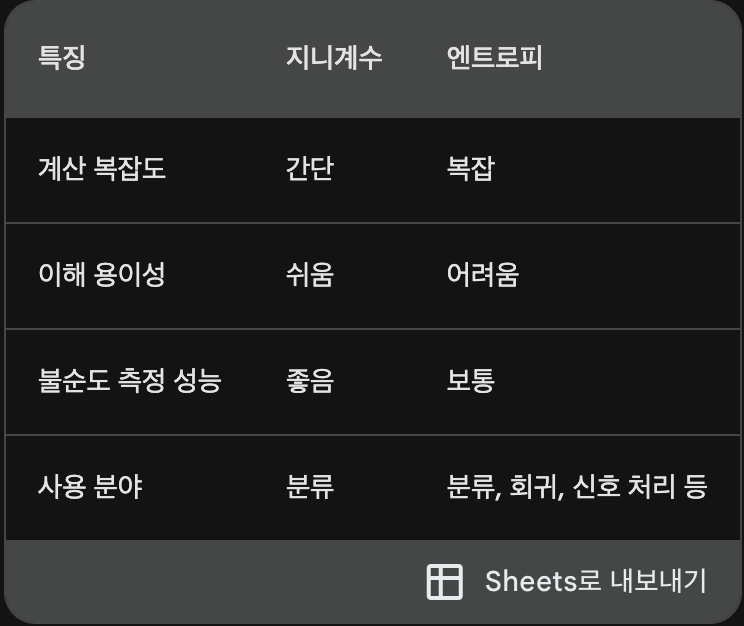

In [ ]:
from sklearn.tree import export_graphviz

In [8]:
df = pd.read_csv(f"{DATA_PATH}preprocessing_data5.csv")

# dividend

In [ ]:
dividend_df = pd.read_csv(f"{DATA_PATH}dividend_df.csv")
dividend_df

,dividendYield,dividendRate,5년평균dividendYield,cluster
0,2.10,1444,2.870,0
1,0.00,0,0.000,1
2,1.01,1200,1.462,3
3,0.00,0,0.000,1
4,2.01,12000,4.364,4
...,...,...,...,...
195,2.01,530,1.185,3
196,6.12,760,4.390,4
197,6.13,2600,3.142,0
198,3.13,700,1.690,3


In [ ]:
keep_columns= ['5년평균dividendYield','cluster']
dividend_df= dividend_df[keep_columns]
dividend_df

,5년평균dividendYield,cluster
0,2.870,0
1,0.000,1
2,1.462,3
3,0.000,1
4,4.364,4
...,...,...
195,1.185,3
196,4.390,4
197,3.142,0
198,1.690,3


In [ ]:
train_ft = dividend_df[dividend_df.columns[:-1]]
target = dividend_df['cluster']
model.fit(train_ft,target)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=42)

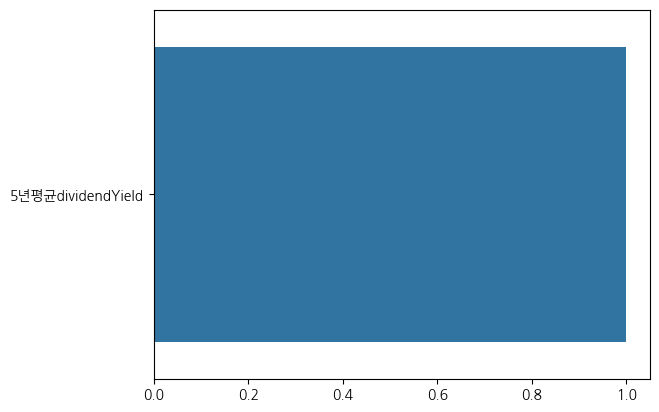

In [ ]:
sns.barplot(x = model.feature_importances_ , y = train_ft.columns)
plt.show()

In [ ]:
params = {
    "random_state" :42,
    "criterion" : "gini",
    "min_samples_split" : 2,
    "max_depth" :None,
    "min_samples_leaf" :1
}
model = DecisionTreeClassifier(**params)
model.fit(train_ft,target)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
cv=KFold(n_splits=5,shuffle=True, random_state= SEED)
scores= cross_val_score(model, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
print(f"CLF : {np.mean(scores)}")

CLF : 0.9966044142614601


In [ ]:
# 튜닝할 하이퍼파라미터 후보들
max_depth_candidates = [None, 5, 10, 15]
min_samples_split_candidates = [2, 5, 10]
min_samples_leaf_candidates = [1, 2, 4]

# 최적의 하이퍼파라미터와 그에 따른 최고 CV 점수 초기화
best_max_depth = None
best_min_samples_split = None
best_min_samples_leaf = None
best_score = 0

# for 루프를 통한 하이퍼파라미터 튜닝
for max_depth in max_depth_candidates:
    for min_samples_split in min_samples_split_candidates:
        for min_samples_leaf in min_samples_leaf_candidates:
            dt_classifier = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            cv_scores = cross_val_score(dt_classifier, train_ft, target, cv=5)
            avg_score = np.mean(cv_scores)

            if avg_score > best_score:
                best_score = avg_score
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

            print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}, Avg CV Score: {avg_score}")

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")

Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.9949999999999999
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score: 0.9949999999999999
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 4, Avg CV Score: 0.9949999999999999
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 1, Avg CV Score: 0.9949999999999999
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 2, Avg CV Score: 0.9949999999999999
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 4, Avg CV Score: 0.9949999999999999
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 1, Avg CV Score: 0.9949999999999999
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 2, Avg CV Score: 0.9949999999999999
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 4, Avg CV Score: 0.9949999999999999
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.9949999999999999
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score:

In [ ]:
params = {
    "decision_tree" : model, # 학습된 모델 객체
    "out_file" : "tree.dot",
    "feature_names" : train_ft.columns,
    "class_names" : ["0","1",'2','3','4']
}

In [ ]:
export_graphviz(**params)

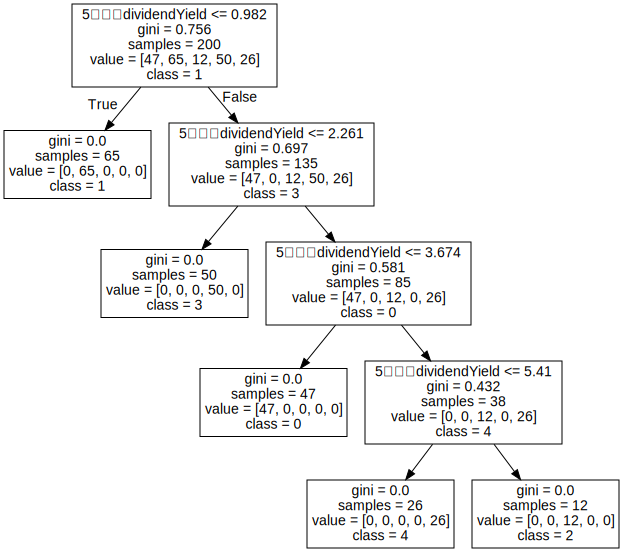

In [ ]:
import graphviz
with open("tree.dot") as f:
    tree = graphviz.Source(f.read())
tree

In [ ]:
dividend_df.cluster.value_counts()

1    65
3    50
0    47
4    26
2    12
Name: cluster, dtype: int64

In [ ]:
dividend_df['5년평균dividendYield'].describe()

count    200.000000
mean       2.171193
std        1.791779
min        0.000000
25%        0.729500
50%        1.755000
75%        3.199000
max        7.286000
Name: 5년평균dividendYield, dtype: float64

In [ ]:
import numpy as np
percentiles= [i for i in range(1,101)]
percentile_values= np.percentile(dividend_df['5년평균dividendYield'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: 0.0
상위 2%: 0.0
상위 3%: 0.0
상위 4%: 0.0
상위 5%: 0.0
상위 6%: 0.0
상위 7%: 0.0
상위 8%: 0.0
상위 9%: 0.0
상위 10%: 0.0
상위 11%: 0.0
상위 12%: 0.0
상위 13%: 0.06960000000000008
상위 14%: 0.13446666666666685
상위 15%: 0.1873999999999999
상위 16%: 0.26847999999999994
상위 17%: 0.31409000000000015
상위 18%: 0.32955
상위 19%: 0.39334
상위 20%: 0.4560000000000002
상위 21%: 0.50474
상위 22%: 0.55496
상위 23%: 0.6675800000000002
상위 24%: 0.69808
상위 25%: 0.7295
상위 26%: 0.7888400000000001
상위 27%: 0.82168
상위 28%: 0.8413600000000001
상위 29%: 0.8641999999999997
상위 30%: 0.9176
상위 31%: 0.92966
상위 32%: 0.96704
상위 33%: 1.0402200000000001
상위 34%: 1.1278800000000002
상위 35%: 1.1588999999999996
상위 36%: 1.22532
상위 37%: 1.2926266666666666
상위 38%: 1.3605200000000002
상위 39%: 1.43254
상위 40%: 1.4461000000000002
상위 41%: 1.4579
상위 42%: 1.47812
상위 43%: 1.536
상위 44%: 1.5753599999999999
상위 45%: 1.6120333333333334
상위 46%: 1.6609733333333332
상위 47%: 1.68624
상위 48%: 1.6940800000000003
상위 49%: 1.7213
상위 50%: 1.755
상위 51%: 1.8324799999999999
상위 52%: 1.9323

# dividend 라벨링 기준

class1: '5년평균dividendYield' <= 0.982 (상위 약 32% 이하) => E등급\
class3: 0.982 < '5년평균dividendYield' <= 2.261 (상위 약 32-57%) => D등급\
class0: 2.261 < '5년평균dividendYield' <= 3.674 (상위 약 57-81%) => C등급\
class4: 3.674 < '5년평균dividendYield' <= 5.41 (상위 약 81-94%) => B등급\
class2: 5.41 < '5년평균dividendYield'  (상위 약 94% 초과) => A등급

In [ ]:
import plotly.express as px

In [ ]:
dividend_df['cluster'] = dividend_df['cluster'].map({1:'E',3:"D",0:"C",4:"B",2:"A"})

In [ ]:
px.scatter(dividend_df,y = '5년평균dividendYield',color = dividend_df['cluster'])

In [ ]:
dividend_df.to_csv(f"{DATA_PATH}dividend_df2.csv",index = False)

# growth

In [9]:
growth_df = pd.read_csv(f"{DATA_PATH}growth_df.csv")
growth_df

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders,cluster
0,8.092350,39.458095,-84.470393,-22.276293,0.10568,4
1,43.394261,-16.141521,148.014122,101.439329,0.85213,0
2,3.776472,-76.688297,-230.389833,-58.142271,0.20546,4
3,91.409439,102.769309,-3.471749,40.993546,0.75171,3
4,11.027966,-50.520435,-55.933714,-9.172326,0.01905,4
...,...,...,...,...,...,...
195,3.185620,-43.133462,-71.122995,-21.217331,0.43818,4
196,14.450168,-35.042735,3.750000,-7.139013,0.72611,4
197,0.300659,-15.142576,88.761468,-8.427487,0.40825,4
198,11.109795,-12.585812,-1.183432,0.892061,0.70120,4


In [ ]:
train_ft = growth_df[growth_df.columns[:-1]]
target = growth_df['cluster']
model.fit(train_ft,target)

DecisionTreeClassifier(random_state=42)

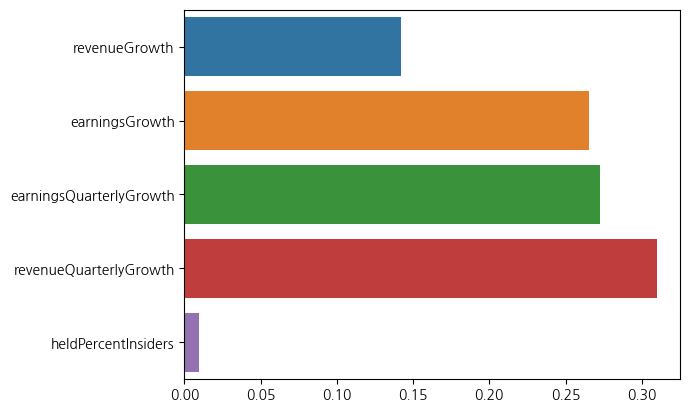

In [ ]:
sns.barplot(x = model.feature_importances_ , y = train_ft.columns)
plt.show()

In [ ]:
# 튜닝할 하이퍼파라미터 후보들
max_depth_candidates = [None, 5, 10, 15]
min_samples_split_candidates = [2, 5, 10]
min_samples_leaf_candidates = [1, 2, 4]

# 최적의 하이퍼파라미터와 그에 따른 최고 CV 점수 초기화
best_max_depth = None
best_min_samples_split = None
best_min_samples_leaf = None
best_score = 0

# for 루프를 통한 하이퍼파라미터 튜닝
for max_depth in max_depth_candidates:
    for min_samples_split in min_samples_split_candidates:
        for min_samples_leaf in min_samples_leaf_candidates:
            dt_classifier = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            cv_scores = cross_val_score(dt_classifier, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
            avg_score = np.mean(cv_scores)

            if avg_score > best_score:
                best_score = avg_score
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

            print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}, Avg CV Score: {avg_score}")

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")

Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.574054273215074
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score: 0.6112738419229258
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 4, Avg CV Score: 0.5818637508523757
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 1, Avg CV Score: 0.5533706228174001
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 2, Avg CV Score: 0.575344373323892
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 4, Avg CV Score: 0.5818637508523757
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 1, Avg CV Score: 0.6341473466874954
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 2, Avg CV Score: 0.6561210971939873
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 4, Avg CV Score: 0.5818637508523757
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.5645349289509541
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score: 0

In [ ]:
params = {
    "random_state" :42,
    "criterion" : "gini",
    "min_samples_split" : 10,
    "max_depth" :10,
    "min_samples_leaf" :2
}
model = DecisionTreeClassifier(**params)
model.fit(train_ft,target)
from sklearn.model_selection import KFold, cross_val_score
cv=KFold(n_splits=5,shuffle=True, random_state= SEED)
scores= cross_val_score(model, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
print(f"CLF : {np.mean(scores)}")

CLF : 0.6645825174162769


In [ ]:
params = {
    "decision_tree" : model, # 학습된 모델 객체
    "out_file" : "tree.dot",
    "feature_names" : train_ft.columns,
    "class_names" : ["0","1",'2','3','4',"5"]
}

In [ ]:
export_graphviz(**params)

# growth 라벨링 기준

In [ ]:
growth_df.cluster.value_counts()

4    130
0     50
3     15
2      3
1      1
5      1
Name: cluster, dtype: int64

In [10]:
from sklearn.manifold import TSNE
import plotly.express as px
def get_3d_tsne(df,labels,name = None):

  tsne = TSNE(n_components=3, random_state=SEED)
  projections = tsne.fit_transform(df)

  fig = px.scatter_3d(
      projections, x=0, y=1, z=2,
      color=labels, labels={'color': 'cluster'},text=name, hover_name=name
  )
  fig.update_traces(marker_size=8)
  fig.show()

In [11]:
get_3d_tsne(growth_df.drop(columns = ['cluster']),growth_df.cluster,df['Name'])

In [12]:
df[df["Name"] == "GKL"][growth] # 하나투어와 동일한 cluster 5가 맞을듯 단기에 매출이 성장했지만 순익률은 여전히 -인 그룹

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
181,207.990599,-79.964695,-207.5,108.316008,0.51009


In [13]:
df[df["Name"] == "하나투어"][growth] # 5

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
178,185.359801,-8.238636,-132.191781,746.938776,0.28329


In [14]:
df[df["Name"] == "DL"][growth] # 5

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
168,119.391216,-86.027999,-121.79132,45.781905,0.43364


In [15]:
growth_df.loc[181,'cluster'] = 5
growth_df.loc[178,'cluster'] = 5
growth_df.loc[168,'cluster'] = 5

In [16]:
df[df["Name"] == "SK스퀘어"][growth] # cluster 2가 맞을듯. 단기 매출도 단기 순익성장도 -이지만, 장기매출은 +인 그룹

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
55,293.466504,-29.487885,-212.623656,-99.152222,0.30087


In [17]:
growth_df.loc[55,'cluster'] = 2

In [18]:
growth_df[growth_df['cluster'] == 2]

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders,cluster
55,293.466504,-29.487885,-212.623656,-99.152222,0.30087,2
65,-12.471384,-339.640045,-2223.572744,-31.838059,0.37909,2
82,61.174531,-1190.566038,-1850.000000,57.822829,0.41286,2
87,34.973046,-1947.619048,-39.029768,-42.541436,0.48728,2


In [19]:
df[df["Name"] == "한국가스공사"][growth] # 6

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
108,87.946208,55.209953,-81.062356,28.258521,0.48969


In [20]:
df[df["Name"] == "롯데웰푸드"][growth] # 6 단기 순손실 발생 중이고, 장기매출, 장기순익, 단기매출은 증가.

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
184,49.310152,20.936639,-100.0,89.719257,0.70164


In [21]:
df[df["Name"] == "코스모화학"][growth] # 새로운 클러스터가 좋지않을까? 6

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
134,40.109247,34.042553,-128.448276,56.237492,0.32656


In [22]:
growth_df.loc[108,'cluster'] = 6
growth_df.loc[184,'cluster'] = 6
growth_df.loc[134,'cluster'] = 6

In [23]:
growth_df[growth_df['cluster'] == 3]

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders,cluster
3,91.409439,102.769309,-3.471749,40.993546,0.75171,3
17,66.598155,287.963153,-108.995144,-5.918524,0.34946,3
23,17.444655,368.385229,-17.123137,31.158095,0.19417,3
37,56.331515,198.807878,-52.739597,24.536283,0.34275,3
66,114.609381,1384.063745,-77.949464,35.208824,0.36329,3
75,66.076019,96.058459,23.340249,13.795470,0.59379,3
88,10.123586,278.404669,38.167939,1.033363,0.33778,3
99,40.053715,122.315286,27.199282,9.681628,0.50735,3
100,42.186823,123.803191,-42.589286,16.075937,0.41708,3
161,23.656514,144.326867,-100.000000,-15.908233,0.71348,3


In [24]:
growth_df[growth_df['cluster'] == 2]

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders,cluster
55,293.466504,-29.487885,-212.623656,-99.152222,0.30087,2
65,-12.471384,-339.640045,-2223.572744,-31.838059,0.37909,2
82,61.174531,-1190.566038,-1850.000000,57.822829,0.41286,2
87,34.973046,-1947.619048,-39.029768,-42.541436,0.48728,2


In [25]:
get_3d_tsne(growth_df.drop(columns = ['cluster']),growth_df.cluster,df['Name'])

In [ ]:
growth_df['cluster'].value_counts()

4    129
0     47
3     13
2      4
6      3
5      3
1      1
Name: cluster, dtype: int64

In [ ]:
df[growth_df['cluster'] == 1][growth]

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
129,7.900071,-30.365093,10714.285714,15.697796,0.43546


In [ ]:
growth_df['cluster'] = growth_df['cluster'].map({3:"A",6:"A-",0:"B",5:"B-",1:"C+",4:"C",2:"D"})

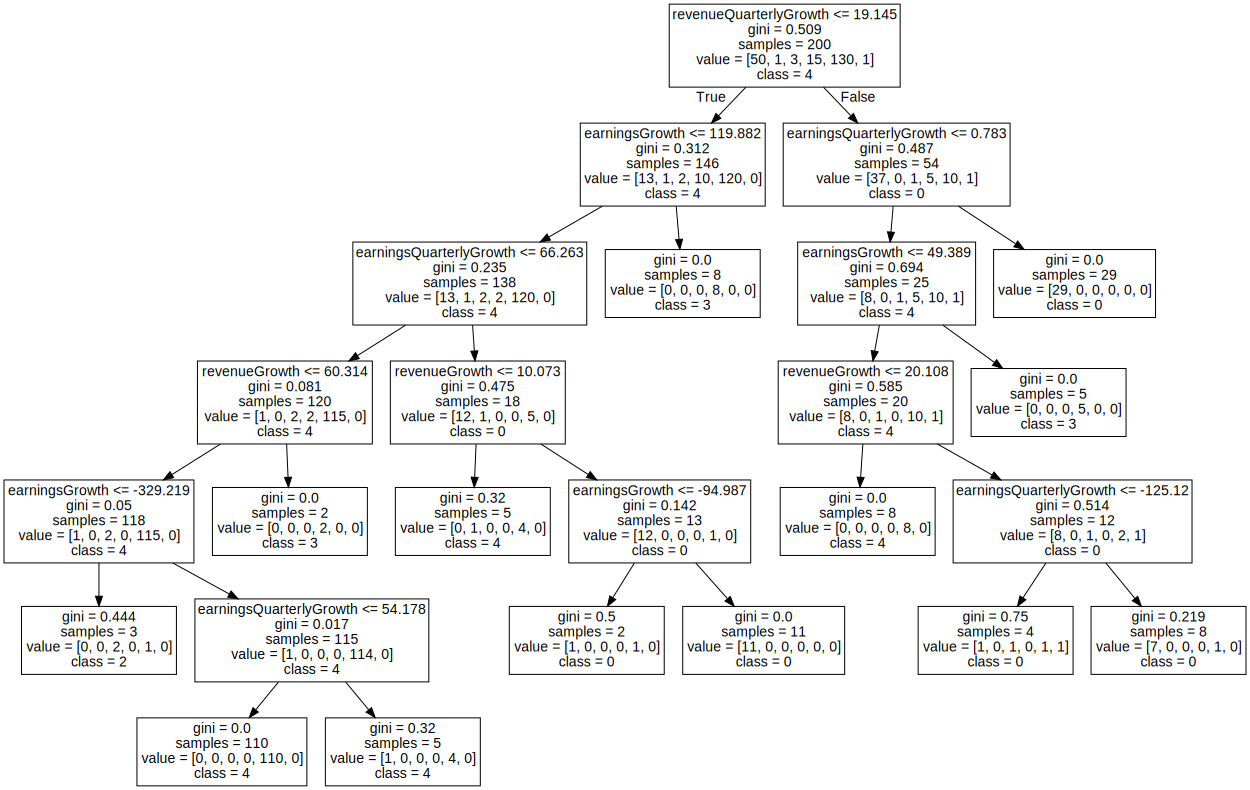

In [ ]:
매출 분기별 성장은 높고 순이익 분기별 성장도 높다(상위 59%) -> 0 class
매출 분기별 성장 높고, 순이익 분기별 성장은 낮고, 순이익 성장은 낮고 매출 성장 높다(상위 56%) -> 0 class
매출 분기별 성장 낮고, 순이익 성장 낮은데, 순이익 분기별 성장이 높고(상위 84%), 매출 성장(상위 30%) 낮지 않다. -> 0 class

0 class => 전체적으로 순이익 성장이 낮은 편? 4 class보다 낮지 않았다.
매출 성장과 순이익 분기별 성장이 높은 편? 둘다 4 class보다 높았고 특히 순이익 분기별 성장은 3 class보다도 높았다.(상위 95% 수준)
매출 분기별 성장도 높았다. (상위 84% 수준) -> 매출 분기별 성장이 낮은 경우에는 순이익 분기별 성장이 높았다.

0 class => 분기별 성장이 높은 편.





매출 분기별 성장 높고 순이익 분기별 성장은 낮은데, 순이익 성장 매우 높다(상위 84%) -> 3 class
매출 분기별 성장 낮은데 순이익 성장이 매우 높다(상위 94%) -> 3 class
매출 분기별 성장, 순이익 성장, 순이익 분기별 성장 낮은데 매출 성장 매우 높다(상위 93%) -> 3 class

 3 class => 분기별 성장은 높은 편이 아니지만, 순이익 성장이 매우 높거나 / 순이익 성장이 낮은 편일 경우 매출 성장이 매우 높다 (전 분기 대비는 낮지만 전 년도 대비 높은 class)


매출 분기별 성장,  순이익 분기별 성장, 매출 성장 전부 낮고, 순이익 성장은 아주 낮은(상위 2% 미만) -> 2 class

6 단기 순손실 발생 중이고, 장기매출, 장기순익, 단기매출은 증가.


3 class => A (연별 성장이 큰 편)
6 class > A- (연별 성장이 크지만, 단기 손실폭이 큰 편)
0 class => B (분기별 성장이 큰 편)
# 5 class => B- 0대비 단기순익 실적은 좋으나 장기실적부실
# 1 class => C+
4 class => C (중간 정도)
2 class => D (전체적으로 낮은 편)

5 class => 매출 성장 관련 지표가 버그 수준 => 0 class 평균이랑 비교했을 때 earningsQuarterlyGrowth 만 떨어짐 => B+ 정도
1 class => 순이익 분기 성장 지표가 버그 수준 => 4 class 평균이랑 비교했을 때 earningGrowth도 더 높은 편이고, revenueGrowth 더 높았고, earningQuarterlyGrowth도 아주 낮은 편이 아니었다. => C+ 정도

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(growth_df['earningsGrowth'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -463.046912383779
상위 2%: -319.21385353146644
상위 3%: -286.136360530272
상위 4%: -225.32268499255065
상위 5%: -190.07504180756757
상위 6%: -179.26467619417804
상위 7%: -155.08340939837979
상위 8%: -147.84716172183158
상위 9%: -116.58550348487941
상위 10%: -107.41053925272244
상위 11%: -98.86864169730951
상위 12%: -96.79771465634002
상위 13%: -95.45996034534149
상위 14%: -91.77794267450248
상위 15%: -80.87419100917526
상위 16%: -75.2952342395592
상위 17%: -72.89546557061142
상위 18%: -70.27750230169657
상위 19%: -66.20804908993314
상위 20%: -64.09452803345802
상위 21%: -59.82683813609559
상위 22%: -56.763569717874105
상위 23%: -55.41832269403472
상위 24%: -52.03575994874351
상위 25%: -50.04208064294828
상위 26%: -49.41910386827453
상위 27%: -48.11085562078713
상위 28%: -44.31508120098842
상위 29%: -43.55851885527243
상위 30%: -41.36937504688083
상위 31%: -35.80331795192558
상위 32%: -34.76762974457499
상위 33%: -32.660059348038125
상위 34%: -31.115722698944733
상위 35%: -30.40863344072297
상위 36%: -28.915638766519823
상위 37%: -28.18043785455086
상

In [ ]:
import numpy as np
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(growth_df['earningsQuarterlyGrowth'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -814.4599999999999
상위 2%: -491.3591654247392
상위 3%: -271.84583333333336
상위 4%: -255.65704647676165
상위 5%: -223.15838054252748
상위 6%: -212.90971482000933
상위 7%: -202.48398004434588
상위 8%: -184.8885139022052
상위 9%: -163.37023593466424
상위 10%: -154.02874193155523
상위 11%: -138.30286861010026
상위 12%: -132.49362612545687
상위 13%: -127.64155317299333
상위 14%: -122.95798065947318
상위 15%: -110.99597078821458
상위 16%: -104.91127561769069
상위 17%: -100.55799533864227
상위 18%: -100.0
상위 19%: -99.11180917264038
상위 20%: -94.48233958650266
상위 21%: -93.14661319073085
상위 22%: -89.8101273114377
상위 23%: -85.4801774442031
상위 24%: -81.96313559322034
상위 25%: -80.35030049179854
상위 26%: -76.15055312875569
상위 27%: -71.59765235566543
상위 28%: -69.66922094508301
상위 29%: -67.08377331031916
상위 30%: -64.77245465689815
상위 31%: -63.48376057338413
상위 32%: -59.71855512458056
상위 33%: -56.542773941695984
상위 34%: -54.617251140524765
상위 35%: -52.874488090755044
상위 36%: -49.534125754016046
상위 37%: -43.42265810096592
상위 38%

In [ ]:
import numpy as np
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(growth_df['revenueQuarterlyGrowth'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -80.89899451982369
상위 2%: -57.69681442481263
상위 3%: -40.35843120743328
상위 4%: -32.14115329002336
상위 5%: -31.296601164674083
상위 6%: -29.60536084725407
상위 7%: -28.50507684681912
상위 8%: -24.86275591962149
상위 9%: -23.797900599062448
상위 10%: -21.781992430096867
상위 11%: -21.25621473395871
상위 12%: -20.138601770501637
상위 13%: -19.86529877371105
상위 14%: -19.556660679775966
상위 15%: -18.33404501375699
상위 16%: -16.726104709160627
상위 17%: -16.17240679047402
상위 18%: -15.72118017812788
상위 19%: -14.067914749371404
상위 20%: -12.802876575916427
상위 21%: -12.111467876189362
상위 22%: -11.54465886813303
상위 23%: -11.389412777683212
상위 24%: -11.213701766618053
상위 25%: -10.509628135781615
상위 26%: -9.552521459287687
상위 27%: -8.65355556674269
상위 28%: -7.86403676090695
상위 29%: -6.272466091967897
상위 30%: -5.191459308542562
상위 31%: -4.6233698245334
상위 32%: -3.584819214056519
상위 33%: -3.330848500408587
상위 34%: -2.7191434914943238
상위 35%: -2.0800190573594795
상위 36%: -1.7956033098646222
상위 37%: -0.713813335316962

In [ ]:
import numpy as np
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(growth_df['revenueGrowth'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -18.40005038394268
상위 2%: -14.986593796178072
상위 3%: -12.462005214774898
상위 4%: -11.667625457947652
상위 5%: -10.365371304921013
상위 6%: -8.553396804632778
상위 7%: -5.855084672295962
상위 8%: -3.1851768820365645
상위 9%: -2.1148236149110806
상위 10%: -1.7858761630941555
상위 11%: -1.1529135911371649
상위 12%: -0.015135932323381257
상위 13%: 0.3839174345230164
상위 14%: 2.673129609775532
상위 15%: 3.3016014362555444
상위 16%: 3.484534472134538
상위 17%: 3.7354690138962834
상위 18%: 4.259518404961879
상위 19%: 4.757310459014781
상위 20%: 5.204900791932563
상위 21%: 5.430185530620373
상위 22%: 5.851700906994427
상위 23%: 6.705313598252607
상위 24%: 6.897699487480752
상위 25%: 7.7016592181388805
상위 26%: 8.160777284968674
상위 27%: 8.311006773977173
상위 28%: 8.81466205874418
상위 29%: 9.010261590663216
상위 30%: 9.42891674293751
상위 31%: 10.113983896752806
상위 32%: 10.65057450744456
상위 33%: 10.93964901739692
상위 34%: 11.081973163168266
상위 35%: 11.234350323177441
상위 36%: 11.352013798365729
상위 37%: 11.817591484218651
상위 38%: 12.153872

In [ ]:
3 > 0 > 4 > 2

In [ ]:
growth_df[growth_df]

In [ ]:
growth_df.cluster.value_counts()

4    130
0     50
3     15
2      3
1      1
5      1
Name: cluster, dtype: int64

In [ ]:
growth_df = pd.read_csv(f"{DATA_PATH}growth_df.csv")
growth_df

,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders,cluster
0,8.092350,39.458095,-84.470393,-22.276293,0.10568,4
1,43.394261,-16.141521,148.014122,101.439329,0.85213,0
2,3.776472,-76.688297,-230.389833,-58.142271,0.20546,4
3,91.409439,102.769309,-3.471749,40.993546,0.75171,3
4,11.027966,-50.520435,-55.933714,-9.172326,0.01905,4
...,...,...,...,...,...,...
195,3.185620,-43.133462,-71.122995,-21.217331,0.43818,4
196,14.450168,-35.042735,3.750000,-7.139013,0.72611,4
197,0.300659,-15.142576,88.761468,-8.427487,0.40825,4
198,11.109795,-12.585812,-1.183432,0.892061,0.70120,4


In [ ]:
df[['Name']+growth].loc[list(growth_df[growth_df.cluster == 1].index)] # 1 class 단기순익률이 매우 크게 증가

,Name,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
129,현대엘리베이,7.900071,-30.365093,10714.285714,15.697796,0.43546


In [ ]:
df[['Name']+growth].loc[list(growth_df[growth_df.cluster == 4].index)] # 4 class (순이익 분기 성장이 상위 99% 이상)

,Name,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
0,삼성전자,8.092350,39.458095,-84.470393,-22.276293,0.10568
2,SK하이닉스,3.776472,-76.688297,-230.389833,-58.142271,0.20546
4,POSCO홀딩스,11.027966,-50.520435,-55.933714,-9.172326,0.01905
5,LG화학,21.750592,-44.472546,-6.612836,18.804075,0.33368
11,카카오,15.808171,-35.451342,-95.174344,5.364170,0.30125
...,...,...,...,...,...,...
195,지누스,3.185620,-43.133462,-71.122995,-21.217331,0.43818
196,케이카,14.450168,-35.042735,3.750000,-7.139013,0.72611
197,현대홈쇼핑,0.300659,-15.142576,88.761468,-8.427487,0.40825
198,쿠쿠홈시스,11.109795,-12.585812,-1.183432,0.892061,0.70120


In [ ]:
df[['Name']+growth].loc[list(growth_df[growth_df.cluster == 5].index)]  # 5 class 0 class 대비해서 단기매출은 크게 늘었지만, 여전히 순손실이 발생하고 있음.

,Name,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
178,하나투어,185.359801,-8.238636,-132.191781,746.938776,0.28329


In [ ]:
df[['Name']+growth].loc[list(growth_df[growth_df.cluster == 0].index)] #LS 올해 영업익 1조 청신호, 한국금융지주 올해 순이익 증가 예상 등등 => 전체적으로 분기별 성장이 높은 듯

,Name,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
1,LG에너지솔루션,43.394261,-16.141521,148.014122,101.439329,0.85213
6,삼성SDI,48.482277,63.099808,28.067273,32.236875,0.20416
7,현대차,21.185931,40.232914,92.382131,24.687939,0.31033
8,NAVER,20.571755,-95.914454,80.883281,17.699677,0.00058
9,포스코퓨처엠,65.966323,-8.893871,11.666667,70.809509,0.63720
10,기아,23.899265,13.627292,105.287623,29.053995,0.37761
13,현대모비스,24.468973,5.278307,61.573896,29.702340,0.31472
14,KB금융,50.881740,-4.817079,2.397377,19.455630,0.02294
20,삼성생명,14.971593,7.704826,144.573130,7.338227,0.51876
22,카카오뱅크,50.793502,28.907398,52.544910,65.632388,0.70162


In [ ]:
df[['Name']+growth].loc[list(growth_df[growth_df.cluster == 3].index)]

,Name,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
3,삼성바이오로직스,91.409439,102.769309,-3.471749,40.993546,0.75171
17,SK이노베이션,66.598155,287.963153,-108.995144,-5.918524,0.34946
23,한국전력,17.444655,368.385229,-17.123137,31.158095,0.19417
37,대한항공,56.331515,198.807878,-52.739597,24.536283,0.34275
55,SK스퀘어,293.466504,-29.487885,-212.623656,-99.152222,0.30087
66,HD현대,114.609381,1384.063745,-77.949464,35.208824,0.36329
75,F&F,66.076019,96.058459,23.340249,13.795470,0.59379
88,현대로템,10.123586,278.404669,38.167939,1.033363,0.33778
99,영원무역,40.053715,122.315286,27.199282,9.681628,0.50735
100,롯데지주,42.186823,123.803191,-42.589286,16.075937,0.41708


In [ ]:
df[['Name']+growth].loc[list(growth_df[growth_df.cluster == 2].index)] # 강원랜드는 순이익에 관한 성장은 아주 낮지만(둘다 상위 1% 미만) 매출에 관한 성장은 아주 높은 편(둘다 상위 93% 이상)

,Name,revenueGrowth,earningsGrowth,earningsQuarterlyGrowth,revenueQuarterlyGrowth,heldPercentInsiders
65,LG디스플레이,-12.471384,-339.640045,-2223.572744,-31.838059,0.37909
82,강원랜드,61.174531,-1190.566038,-1850.000000,57.822829,0.41286
87,한진칼,34.973046,-1947.619048,-39.029768,-42.541436,0.48728


In [ ]:
growth_df0= growth_df[growth_df.cluster==0]
growth_df1= growth_df[growth_df.cluster==1]
growth_df2= growth_df[growth_df.cluster==2]
growth_df3=growth_df[growth_df.cluster==3]
growth_df4=growth_df[growth_df.cluster==4]

In [ ]:
column_name= 'earningsGrowth'
column_sum = growth_df0[column_name].sum()/len(growth_df0[column_name])

print(f"{column_name} 평균: {column_sum}")

earningsGrowth 평균: -15.083251859220022


In [ ]:
column_name= 'earningsGrowth'
column_sum = growth_df2[column_name].sum()/len(growth_df2[column_name])

print(f"{column_name} 평균: {column_sum}")

earningsGrowth 평균: -1159.2750434497575


In [ ]:
column_name= 'earningsGrowth'
column_sum = growth_df4[column_name].sum()/len(growth_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

earningsGrowth 평균: -28.51175832963286


In [ ]:
column_name= 'earningsGrowth'
column_sum = growth_df3[column_name].sum()/len(growth_df3[column_name])

print(f"{column_name} 평균: {column_sum}")

# 3 class는 압도적이다.

earningsGrowth 평균: 251.94148592769722


In [ ]:
column_name= 'revenueGrowth'
column_sum = growth_df0[column_name].sum()/len(growth_df0[column_name])

print(f"{column_name} 평균: {column_sum}")

revenueGrowth 평균: 41.47227743561813


In [ ]:
column_name= 'revenueGrowth'
column_sum = growth_df4[column_name].sum()/len(growth_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

revenueGrowth 평균: 11.926588584249538


In [ ]:
column_name= 'revenueGrowth'
column_sum = growth_df2[column_name].sum()/len(growth_df2[column_name])

print(f"{column_name} 평균: {column_sum}")

revenueGrowth 평균: 27.89206429681076


In [ ]:
column_name= 'revenueGrowth'
column_sum = growth_df3[column_name].sum()/len(growth_df3[column_name])

print(f"{column_name} 평균: {column_sum}")

# 3 class는 압도적이다.

revenueGrowth 평균: 66.30135489348162


In [ ]:
column_name= 'earningsQuarterlyGrowth'
column_sum = growth_df0[column_name].sum()/len(growth_df0[column_name])

print(f"{column_name} 평균: {column_sum}")

earningsQuarterlyGrowth 평균: 153.01500396362837


In [ ]:
column_name= 'earningsQuarterlyGrowth'
column_sum = growth_df4[column_name].sum()/len(growth_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

earningsQuarterlyGrowth 평균: -63.128790604694814


In [ ]:
column_name= 'earningsQuarterlyGrowth'
column_sum = growth_df2[column_name].sum()/len(growth_df2[column_name])

print(f"{column_name} 평균: {column_sum}")

earningsQuarterlyGrowth 평균: -1370.867504160736


In [ ]:
column_name= 'earningsQuarterlyGrowth'
column_sum = growth_df3[column_name].sum()/len(growth_df3[column_name])

print(f"{column_name} 평균: {column_sum}")

# earningQuarterlyGrowth에서는 높지 않았다.

earningsQuarterlyGrowth 평균: -48.25468766570644


In [ ]:
column_name= 'revenueQuarterlyGrowth'
column_sum = growth_df0[column_name].sum()/len(growth_df0[column_name])

print(f"{column_name} 평균: {column_sum}")

revenueQuarterlyGrowth 평균: 35.43621542351038


In [ ]:
column_name= 'revenueQuarterlyGrowth'
column_sum = growth_df4[column_name].sum()/len(growth_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

revenueQuarterlyGrowth 평균: -3.005158212069266


In [ ]:
column_name= 'revenueQuarterlyGrowth'
column_sum = growth_df2[column_name].sum()/len(growth_df2[column_name])

print(f"{column_name} 평균: {column_sum}")

revenueQuarterlyGrowth 평균: -5.518888735458688


In [ ]:
column_name= 'revenueQuarterlyGrowth'
column_sum = growth_df3[column_name].sum()/len(growth_df3[column_name])

print(f"{column_name} 평균: {column_sum}")

revenueQuarterlyGrowth 평균: 4.204622238495353


In [ ]:
column_name= 'heldPercentInsiders'
column_sum = growth_df3[column_name].sum()/len(growth_df3[column_name])

print(f"{column_name} 평균: {column_sum}")

heldPercentInsiders 평균: 0.45426533266666663


In [ ]:
column_name= 'heldPercentInsiders'
column_sum = growth_df0[column_name].sum()/len(growth_df0[column_name])

print(f"{column_name} 평균: {column_sum}")

heldPercentInsiders 평균: 0.41457919697


In [ ]:
growth_df.to_csv(f"{DATA_PATH}growth_df2.csv",index = False)

# value

In [ ]:
value_df = pd.read_csv(f"{DATA_PATH}value.csv")
value_df

,trailingPE,동종업계_대비_PER,cluster
0,8.55,-1.04,4.0
1,167.27,157.68,6.0
2,36.55,26.96,1.0
3,69.74,20.85,1.0
4,14.40,8.11,4.0
...,...,...,...
195,15.92,5.01,4.0
196,19.68,9.55,4.0
197,5.62,-4.51,2.0
198,4.37,-22.36,0.0


In [ ]:
keep_columns= ['동종업계_대비_PER', 'cluster']
value_df= value_df[keep_columns]
value_df

,동종업계_대비_PER,cluster
0,-1.04,4.0
1,157.68,6.0
2,26.96,1.0
3,20.85,1.0
4,8.11,4.0
...,...,...
195,5.01,4.0
196,9.55,4.0
197,-4.51,2.0
198,-22.36,0.0


In [ ]:
value_df['cluster'].value_counts()

4.0    78
2.0    73
0.0    19
1.0    16
3.0     8
6.0     5
5.0     1
Name: cluster, dtype: int64

In [ ]:
train_ft = value_df[value_df.columns[:-1]]
target = value_df['cluster']
model.fit(train_ft,target)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

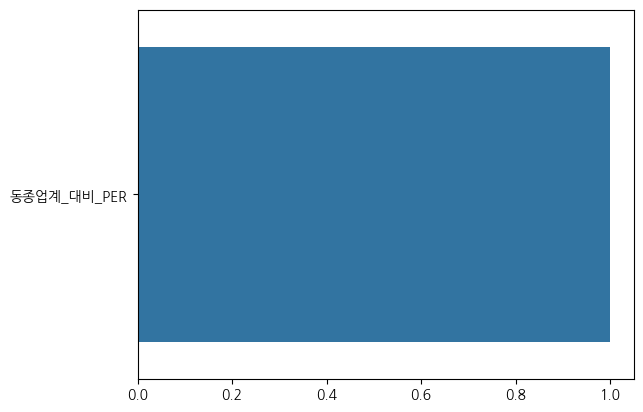

In [ ]:
sns.barplot(x = model.feature_importances_ , y = train_ft.columns)
plt.show()

In [ ]:
# 튜닝할 하이퍼파라미터 후보들
max_depth_candidates = [None, 5, 10, 15]
min_samples_split_candidates = [2, 5, 10]
min_samples_leaf_candidates = [1, 2, 4]

# 최적의 하이퍼파라미터와 그에 따른 최고 CV 점수 초기화
best_max_depth = None
best_min_samples_split = None
best_min_samples_leaf = None
best_score = 0

# for 루프를 통한 하이퍼파라미터 튜닝
for max_depth in max_depth_candidates:
    for min_samples_split in min_samples_split_candidates:
        for min_samples_leaf in min_samples_leaf_candidates:
            dt_classifier = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            cv_scores = cross_val_score(dt_classifier, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
            avg_score = np.mean(cv_scores)

            if avg_score > best_score:
                best_score = avg_score
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

            print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}, Avg CV Score: {avg_score}")

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")

Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.8211724020107732
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score: 0.7539249385938236
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 4, Avg CV Score: 0.7752485639499984
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 1, Avg CV Score: 0.8277072286079002
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 2, Avg CV Score: 0.8074287432777524
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 4, Avg CV Score: 0.7752485639499984
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 1, Avg CV Score: 0.7460315967100517
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 2, Avg CV Score: 0.7632190971205316
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 4, Avg CV Score: 0.7715347653232966
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.8269437714820025
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score:

In [ ]:
params = {
    "random_state" :42,
    "criterion" : "gini",
    "min_samples_split" : 5,
    "max_depth" :5,
    "min_samples_leaf" :1
}
model = DecisionTreeClassifier(**params)
model.fit(train_ft,target)
from sklearn.model_selection import KFold, cross_val_score
cv=KFold(n_splits=5,shuffle=True, random_state= SEED)
scores= cross_val_score(model, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
print(f"CLF : {np.mean(scores)}")

CLF : 0.8385531834165374


In [ ]:
params = {
    "decision_tree" : model, # 학습된 모델 객체
    "out_file" : "tree.dot",
    "feature_names" : train_ft.columns,
    "class_names" : ["0","1",'2','3','4',"5","6"]
}

In [ ]:
export_graphviz(**params)

In [ ]:
import graphviz
with open("tree.dot") as f:
    tree = graphviz.Source(f.read())
tree

# value 라벨링 기준

In [ ]:
value_df["cluster"] = value_df["cluster"].map({5 :"A",6 :"B",1 :"C",4 :"D",2 :"E",0 :"F",3 :"G"})

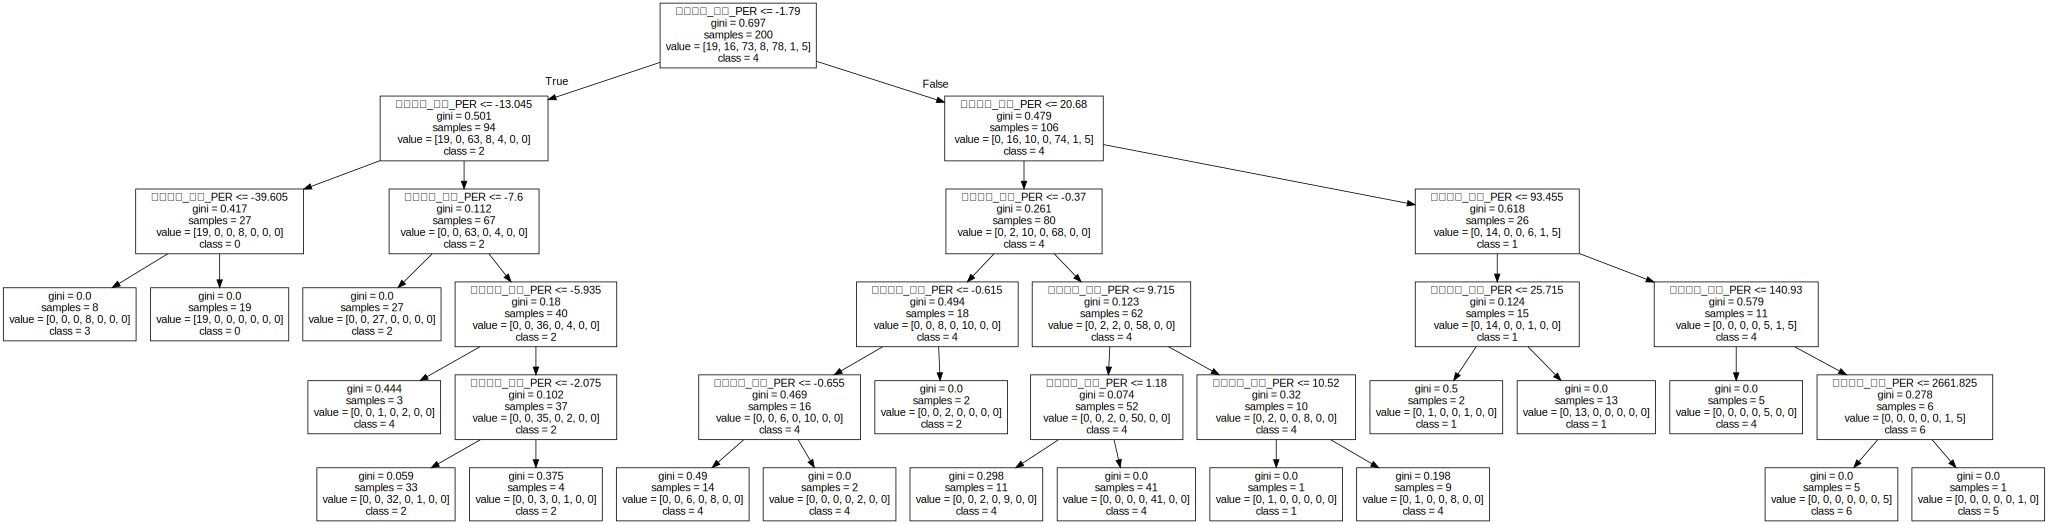

In [ ]:
동종업계 대비 PER <= -39.605 (상위 4% 미만) => class 3 (최하위 등급)
동종업계 대비 PER > 2661.825 (상위 99% 이상) => class 5 (최상위 등급)
140.93 < 동종업계 대비 PER <= 2661.825 (상위 97-99% 사이) => class 6 (차상위 등급)
-39.605 < 동종업계 대비 PER <= -13.045 (상위 4-14% 사이) => class 0 (차하위 등급)

20.68 < 동종업계 대비 PER <= 93.455 (상위 87%-95% 사이) => class 1 (차차상위 등급) 인데 9.88인것이 하나 껴있음.

class 4 > class 2


class 5 => A 등급
class 6 => B 등급
class 1 => C 등급
class 4 => D 등급
class 2 => E 등급
class 0 => F 등급
class 3 => G 등급

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(value_df['동종업계_대비_PER'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -65.208
상위 2%: -60.3152
상위 3%: -48.9635
상위 4%: -36.3252
상위 5%: -28.24299999999999
상위 6%: -26.73
상위 7%: -26.73
상위 8%: -26.73
상위 9%: -21.058699999999998
상위 10%: -19.881999999999998
상위 11%: -16.7717
상위 12%: -14.698000000000002
상위 13%: -14.1299
상위 14%: -11.99
상위 15%: -11.99
상위 16%: -11.99
상위 17%: -10.4734
상위 18%: -10.175
상위 19%: -10.13
상위 20%: -9.764
상위 21%: -9.59
상위 22%: -9.3326
상위 23%: -9.26
상위 24%: -9.1308
상위 25%: -8.1525
상위 26%: -7.7364
상위 27%: -7.595400000000002
상위 28%: -6.298399999999999
상위 29%: -5.5516
상위 30%: -5.53
상위 31%: -5.3258
상위 32%: -5.0216
상위 33%: -4.7732
상위 34%: -4.318599999999997
상위 35%: -3.6835000000000018
상위 36%: -3.560799999999999
상위 37%: -3.4322000000000004
상위 38%: -3.197
상위 39%: -3.0434000000000005
상위 40%: -2.892
상위 41%: -2.7628000000000013
상위 42%: -2.6284
상위 43%: -2.450200000000001
상위 44%: -2.2864
상위 45%: -2.0745
상위 46%: -1.9197999999999993
상위 47%: -1.7894000000000008
상위 48%: -1.6608000000000014
상위 49%: -1.5197999999999998
상위 50%: -1.4449999999999998
상위 51%: -

In [ ]:
value_df = pd.read_csv(f"{DATA_PATH}value.csv")
value_df

,trailingPE,동종업계_대비_PER,cluster
0,8.55,-1.04,4.0
1,167.27,157.68,6.0
2,36.55,26.96,1.0
3,69.74,20.85,1.0
4,14.40,8.11,4.0
...,...,...,...
195,15.92,5.01,4.0
196,19.68,9.55,4.0
197,5.62,-4.51,2.0
198,4.37,-22.36,0.0


In [ ]:
value_df[value_df.cluster==5.0]

,trailingPE,동종업계_대비_PER,cluster
159,4830.0,4781.11,5.0


In [ ]:
value_df[value_df.cluster==1.0] #59번은 9.88인데 껴있음 #8번은 class4와 묶여있다. 동종업계대비 PER만 볼거라면 4번과 묶는게 합리적일듯

,trailingPE,동종업계_대비_PER,cluster
2,36.55,26.96,1.0
3,69.74,20.85,1.0
8,45.44,18.71,1.0
22,50.72,37.10,1.0
49,62.13,50.14,1.0
57,83.57,71.58,1.0
59,58.77,9.88,1.0
71,39.67,30.41,1.0
93,44.14,32.15,1.0
94,40.74,35.21,1.0


In [ ]:
value_df.loc[59,'cluster']  = 4

In [ ]:
import plotly.express as px

In [ ]:
px.scatter(value_df,x ='trailingPE',y= '동종업계_대비_PER',color = 'cluster')

In [ ]:
value_df0= value_df[value_df.cluster==0.0]
value_df1= value_df[value_df.cluster==1.0]
value_df2= value_df[value_df.cluster==2.0]
value_df3= value_df[value_df.cluster==3.0]
value_df4= value_df[value_df.cluster==4.0]
value_df5= value_df[value_df.cluster==5.0]
value_df6= value_df[value_df.cluster==6.0]

In [ ]:
column_name= '동종업계_대비_PER'
column_sum = value_df4[column_name].sum()/len(value_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

동종업계_대비_PER 평균: 11.752179487179488


In [ ]:
column_name= '동종업계_대비_PER'
column_sum = value_df1[column_name].sum()/len(value_df1[column_name])

print(f"{column_name} 평균: {column_sum}")

동종업계_대비_PER 평균: 40.380625


In [ ]:
column_name= 'trailingPE'
column_sum = value_df4[column_name].sum()/len(value_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

trailingPE 평균: 22.99923076923077


In [ ]:
column_name= 'trailingPE'
column_sum = value_df1[column_name].sum()/len(value_df1[column_name])

print(f"{column_name} 평균: {column_sum}")

trailingPE 평균: 56.46187499999999


In [ ]:
column_name= '동종업계_대비_PER'
column_sum = value_df4[column_name].sum()/len(value_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

동종업계_대비_PER 평균: 11.752179487179488


In [ ]:
column_name= '동종업계_대비_PER'
column_sum = value_df2[column_name].sum()/len(value_df2[column_name])

print(f"{column_name} 평균: {column_sum}")

동종업계_대비_PER 평균: -5.562876712328767


In [ ]:
column_name= 'trailingPE'
column_sum = value_df4[column_name].sum()/len(value_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

trailingPE 평균: 22.99923076923077


In [ ]:
column_name= 'trailingPE'
column_sum = value_df2[column_name].sum()/len(value_df2[column_name])

print(f"{column_name} 평균: {column_sum}")

trailingPE 평균: 3.448630136986301


In [ ]:
column_name = '동종업계_대비_PER'

selected_rows = value_df[(value_df[column_name] >= -0.615) & (value_df[column_name] <= -0.37)]

selected_rows #85번, 109번은 동종업계대비PER로만 판단한다면 class4에 분류하는게 좋아보임

,trailingPE,동종업계_대비_PER,cluster
85,5.02,-0.51,2.0
109,5.58,-0.58,2.0


# business

In [ ]:
business_df = pd.read_csv(f"{DATA_PATH}business_df.csv")
business_df

,returnOnAssets,returnOnEquity,grossMargins,operatingMargins,profitMargins,cluster
0,12.72,17.07,0.31973,0.06079,0.13136,0.0
1,2.51,5.75,0.16030,0.04959,0.03470,0.0
2,2.24,3.56,0.22851,0.01446,-0.06215,0.0
3,6.50,11.42,0.48978,0.31111,0.24693,1.0
4,3.75,6.11,0.07330,0.03970,0.02607,0.0
...,...,...,...,...,...,...
195,2.75,5.32,0.29626,0.04149,0.01470,0.0
196,5.60,11.65,0.09323,0.02350,0.01434,0.0
197,3.21,4.49,0.43377,0.04420,0.05994,0.0
198,11.77,17.66,0.60069,0.11585,0.12216,1.0


In [ ]:
business_df['cluster'].value_counts()

0.0    159
1.0     36
2.0      5
Name: cluster, dtype: int64

In [ ]:
train_ft = business_df[business_df.columns[:-1]]
target = business_df['cluster']
model.fit(train_ft,target)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

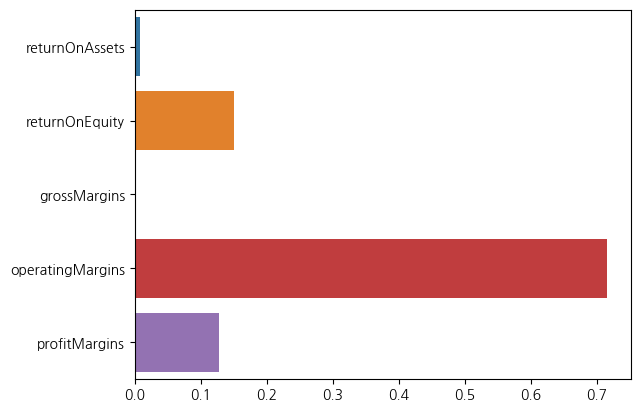

In [ ]:
sns.barplot(x = model.feature_importances_ , y = train_ft.columns)
plt.show()

In [ ]:
# 튜닝할 하이퍼파라미터 후보들
max_depth_candidates = [None, 5, 10, 15]
min_samples_split_candidates = [2, 5, 10]
min_samples_leaf_candidates = [1, 2, 4]

# 최적의 하이퍼파라미터와 그에 따른 최고 CV 점수 초기화
best_max_depth = None
best_min_samples_split = None
best_min_samples_leaf = None
best_score = 0

# for 루프를 통한 하이퍼파라미터 튜닝
for max_depth in max_depth_candidates:
    for min_samples_split in min_samples_split_candidates:
        for min_samples_leaf in min_samples_leaf_candidates:
            dt_classifier = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            cv_scores = cross_val_score(dt_classifier, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
            avg_score = np.mean(cv_scores)

            if avg_score > best_score:
                best_score = avg_score
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

            print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}, Avg CV Score: {avg_score}")

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")

Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.8373717631198903
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score: 0.8810928747673017
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 4, Avg CV Score: 0.7778294687158341
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 1, Avg CV Score: 0.9164450991526216
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 2, Avg CV Score: 0.7601636040473243
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 4, Avg CV Score: 0.8629661665916608
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 1, Avg CV Score: 0.7934099500605011
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 2, Avg CV Score: 0.7933241172706812
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 4, Avg CV Score: 0.8629661665916608
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.9164450991526216
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score:

In [ ]:
params = {
    "random_state" :42,
    "criterion" : "gini",
    "min_samples_split" : 5,
    "max_depth" :5,
    "min_samples_leaf" :1
}
model = DecisionTreeClassifier(**params)
model.fit(train_ft,target)
from sklearn.model_selection import KFold, cross_val_score
cv=KFold(n_splits=5,shuffle=True, random_state= SEED)
scores= cross_val_score(model, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
print(f"CLF : {np.mean(scores)}")

CLF : 0.78109356587971


In [ ]:
params = {
    "random_state" :42,
    "criterion" : "gini",
    "min_samples_split" : 2,
    "max_depth" :None,
    "min_samples_leaf" :2
}
model = DecisionTreeClassifier(**params)
model.fit(train_ft,target)
from sklearn.model_selection import KFold, cross_val_score
cv=KFold(n_splits=5,shuffle=True, random_state= SEED)
scores= cross_val_score(model, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
print(f"CLF : {np.mean(scores)}")

CLF : 0.78109356587971


In [ ]:
params = {
    "decision_tree" : model, # 학습된 모델 객체
    "out_file" : "tree.dot",
    "feature_names" : train_ft.columns,
    "class_names" : ["0","1",'2','3','4',"5","6"]
}

In [ ]:
export_graphviz(**params)

In [ ]:
import graphviz
with open("tree.dot") as f:
    tree = graphviz.Source(f.read())
tree

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
get_3d_tsne(scaler.fit_transform(business_df),business_df.cluster,df['Name'])

# business 라벨링 기준

In [ ]:
import plotly.express as px
fig = px.scatter_3d(business_df, x='returnOnEquity', y='profitMargins', z='operatingMargins',
                    color='cluster', symbol='cluster', opacity=0.7, text=df['Name'])
fig.update_layout(legend_xanchor="left", legend_yanchor="bottom")
fig.show()

In [ ]:
business_df[business_df['cluster'] == 0]['profitMargins'] > business_df[business_df['cluster'] == 0]['profitMargins'].describe()['mean']

0       True
1       True
2      False
4       True
5       True
       ...  
194     True
195    False
196    False
197     True
199     True
Name: profitMargins, Length: 159, dtype: bool

In [ ]:
mask = business_df[business_df['cluster'] == 0]['profitMargins'] > business_df[business_df['cluster'] == 0]['profitMargins'].describe()['mean']

In [ ]:
business_df[business_df['cluster'] == 0][mask].index

Int64Index([  0,   1,   4,   5,   6,   8,   9,  10,  13,  15,  16,  20,  26,
             28,  31,  35,  36,  47,  49,  50,  52,  54,  56,  58,  59,  61,
             62,  63,  67,  70,  71,  72,  73,  80,  81,  92,  94,  95,  97,
             98, 101, 102, 104, 107, 110, 114, 115, 118, 119, 123, 128, 129,
            133, 137, 138, 139, 143, 145, 149, 151, 154, 155, 161, 162, 163,
            165, 166, 167, 169, 170, 171, 174, 179, 180, 181, 182, 183, 185,
            186, 187, 189, 190, 192, 194, 197, 199],
           dtype='int64')

In [ ]:
zero_cluster_upper = list(business_df[business_df['cluster'] == 0][mask].index)

In [ ]:
business_df.loc[zero_cluster_upper,'cluster'] = 3

In [ ]:
business_df['cluster'].value_counts()

3.0    86
0.0    73
1.0    36
2.0     5
Name: cluster, dtype: int64

In [ ]:
business_df.loc[177, 'cluster'] = 4

In [ ]:
import plotly.express as px
fig = px.scatter_3d(business_df, x='returnOnEquity', y='profitMargins', z='operatingMargins',
                    color='cluster', text=df['Name'])
fig.update_layout(legend_xanchor="left", legend_yanchor="bottom")
fig.show()

In [ ]:
business_df['cluster'] = business_df['cluster'].map({1:"A",3:"B",0:"C",2:"D"})

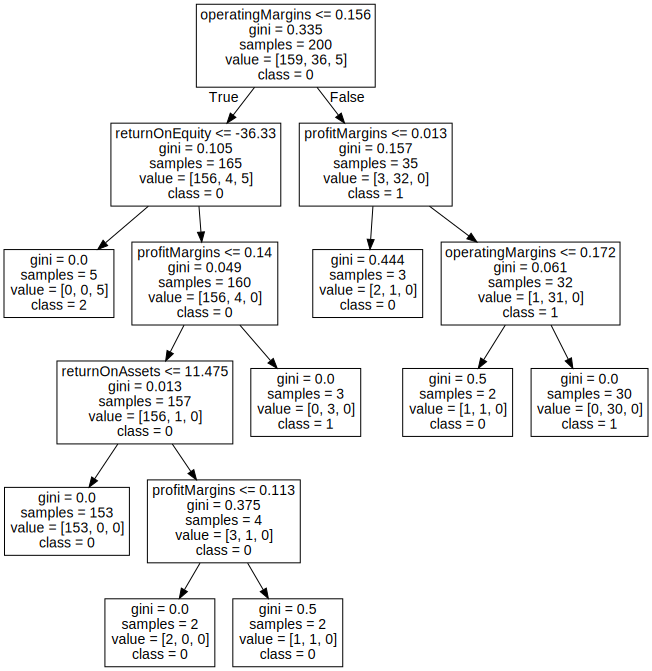

In [ ]:
영업 이익률이 높지 않고(상위 83% 이하), ROE 상위 2% 미만 => 2 class (최하위 클래스) 순이익 마진도 다른 class에 비해서 가장 낮았다.

영업 이익률 높고(상위 83% 이상) 순이익 마진도 높다 => 1 class (최상위 클래스)
영업 이익률이 높지 않고, 자기자본이익률이 너무 낮지 않은 것들 중, 순이익 마진이 높다(상위 89% 이상) => 1 class (최상위 클래스)

1 class => A 등급
3 class => B 등급 : 0 클래스 내에서 순익률이 높은 기업,,
0 class => C 등급
2 class => D 등급

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(business_df['operatingMargins'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -0.4070192998
상위 2%: -0.238668
상위 3%: -0.1847045997
상위 4%: -0.1233368
상위 5%: -0.10714899429999998
상위 6%: -0.0678292
상위 7%: -0.039629999999999985
상위 8%: -0.0202648
상위 9%: -0.0053563999099999985
상위 10%: -0.0032449999999999975
상위 11%: -0.0023459999779999996
상위 12%: 0.0
상위 13%: 0.001243499913000001
상위 14%: 0.003817999986000003
상위 15%: 0.007650000254999999
상위 16%: 0.01340240016
상위 17%: 0.01677440000000001
상위 18%: 0.020442398820000002
상위 19%: 0.022951100000000006
상위 20%: 0.023496
상위 21%: 0.02486610021
상위 22%: 0.02560519956
상위 23%: 0.027634299230000006
상위 24%: 0.0287872
상위 25%: 0.030044999500000003
상위 26%: 0.0309408
상위 27%: 0.031752
상위 28%: 0.0320428
상위 29%: 0.0325759
상위 30%: 0.033320999999999996
상위 31%: 0.03510660207
상위 32%: 0.03730080204
상위 33%: 0.03745349866
상위 34%: 0.0389166
상위 35%: 0.04024599999999999
상위 36%: 0.04122000192
상위 37%: 0.04282829999999999
상위 38%: 0.04337040048
상위 39%: 0.044133700000000005
상위 40%: 0.0447559992
상위 41%: 0.04602819999999998
상위 42%: 0.047714599999999996
상위 

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(business_df['returnOnEquity'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -64.54780000000001
상위 2%: -36.864799999999995
상위 3%: -26.9887
상위 4%: -17.1208
상위 5%: -14.636
상위 6%: -11.8002
상위 7%: -9.079599999999997
상위 8%: -6.9332
상위 9%: -5.9877
상위 10%: -3.634
상위 11%: -3.2643999999999997
상위 12%: -2.088
상위 13%: -1.2368999999999999
상위 14%: 0.11360000000000077
상위 15%: 0.5744999999999996
상위 16%: 0.7288
상위 17%: 0.8883000000000001
상위 18%: 1.4510000000000003
상위 19%: 1.8472000000000004
상위 20%: 1.87
상위 21%: 2.2112
상위 22%: 2.7242000000000006
상위 23%: 3.0363000000000007
상위 24%: 3.1952000000000003
상위 25%: 3.3125
상위 26%: 3.4518000000000004
상위 27%: 3.5746
상위 28%: 3.6304000000000003
상위 29%: 3.9225999999999996
상위 30%: 4.287
상위 31%: 4.3976
상위 32%: 4.6192
상위 33%: 4.8135
상위 34%: 4.8666
상위 35%: 5.068999999999999
상위 36%: 5.1556
상위 37%: 5.3015
상위 38%: 5.5334
상위 39%: 5.6876
상위 40%: 6.046000000000002
상위 41%: 6.1476999999999995
상위 42%: 6.5448
상위 43%: 6.718299999999998
상위 44%: 6.8856
상위 45%: 6.962000000000001
상위 46%: 7.1462
상위 47%: 7.1753
상위 48%: 7.356
상위 49%: 7.796500000000001
상위 50%

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(business_df['grossMargins'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -0.10089769604000001
상위 2%: -0.023368600000000003
상위 3%: 0.0
상위 4%: 0.0
상위 5%: 0.0
상위 6%: 0.0
상위 7%: 0.0
상위 8%: 0.0
상위 9%: 0.0
상위 10%: 0.0
상위 11%: 0.0
상위 12%: 0.008263199999999991
상위 13%: 0.014155700000000004
상위 14%: 0.037156400000000006
상위 15%: 0.040063999999999995
상위 16%: 0.044952000320000005
상위 17%: 0.05674010000000007
상위 18%: 0.0685862
상위 19%: 0.07411810405000001
상위 20%: 0.081858
상위 21%: 0.08877690105
상위 22%: 0.09111679776
상위 23%: 0.09297700115
상위 24%: 0.0969212038
상위 25%: 0.09847249999999999
상위 26%: 0.1022888
상위 27%: 0.10807950365
상위 28%: 0.10956840112
상위 29%: 0.11144900115999999
상위 30%: 0.1122870042
상위 31%: 0.1151431
상위 32%: 0.1175467984
상위 33%: 0.1208255933
상위 34%: 0.12365299864000004
상위 35%: 0.12833250649999997
상위 36%: 0.1352672
상위 37%: 0.1408892
상위 38%: 0.1450803938
상위 39%: 0.149783
상위 40%: 0.15241399400000002
상위 41%: 0.1561425941
상위 42%: 0.1614194
상위 43%: 0.16351251
상위 44%: 0.167568
상위 45%: 0.1710945045
상위 46%: 0.17965040000000002
상위 47%: 0.1829695
상위 48%: 0.1846123948

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(business_df['profitMargins'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -0.3086825
상위 2%: -0.2724182
상위 3%: -0.1948902003
상위 4%: -0.1765392
상위 5%: -0.1716695005
상위 6%: -0.08226300564000001
상위 7%: -0.06273379964999999
상위 8%: -0.05275840024
상위 9%: -0.04014160146
상위 10%: -0.0203709999
상위 11%: -0.015236600055
상위 12%: -0.010249200000000003
상위 13%: -0.008117899999999999
상위 14%: -0.004933600257999993
상위 15%: -0.002233500000000002
상위 16%: -1.6000001600000014e-06
상위 17%: 0.0
상위 18%: 0.0
상위 19%: 0.0
상위 20%: 0.0
상위 21%: 0.002052300010499999
상위 22%: 0.003959000044000001
상위 23%: 0.0045024
상위 24%: 0.0049504
상위 25%: 0.0061875
상위 26%: 0.007445000078000002
상위 27%: 0.0078749
상위 28%: 0.0081904
상위 29%: 0.008410999999999998
상위 30%: 0.012956999999999993
상위 31%: 0.013942499999999998
상위 32%: 0.0145848
상위 33%: 0.015709999670000002
상위 34%: 0.0164732
상위 35%: 0.016994
상위 36%: 0.01761440064
상위 37%: 0.0208712
상위 38%: 0.022443601240000003
상위 39%: 0.022935999999999998
상위 40%: 0.025690000400000006
상위 41%: 0.02648719941
상위 42%: 0.02678859958
상위 43%: 0.027380299999999996
상위 44%: 0.02

In [ ]:
business_df[business_df.cluster==2.0] #매출 총이익만 -가 아니다.

,returnOnAssets,returnOnEquity,grossMargins,operatingMargins,profitMargins,cluster
23,-10.96,-46.90,-0.36885,-0.40670,-0.30712,2.0
34,-15.27,-117.79,-0.18581,-0.23632,-0.27171,2.0
48,-21.32,-36.66,0.86572,-0.43863,-0.40100,2.0
177,-14.47,-154.22,1.00000,-0.66579,-1.43880,2.0
178,-14.58,-64.01,0.99835,-0.35372,-0.17159,2.0


In [ ]:
business_df0= business_df[business_df.cluster==0.0]
business_df1= business_df[business_df.cluster==1.0]
business_df2= business_df[business_df.cluster==2.0]

In [ ]:
column_name= 'profitMargins'
column_sum = business_df2[column_name].sum()/len(business_df2[column_name])

print(f"{column_name} 평균: {column_sum}")

profitMargins 평균: -0.5180440199999999


In [ ]:
column_name= 'profitMargins'
column_sum = business_df1[column_name].sum()/len(business_df1[column_name])

print(f"{column_name} 평균: {column_sum}")

profitMargins 평균: 0.1860705541388889


In [ ]:
column_name= 'profitMargins'
column_sum = business_df0[column_name].sum()/len(business_df0[column_name])

print(f"{column_name} 평균: {column_sum}")

profitMargins 평균: 0.024090754772006288


In [ ]:
column_name = 'operatingMargins'

selected_rows = business_df[(business_df[column_name] > 0.156) & (business_df['profitMargins']>0.013)]

selected_rows
selected_rows2= selected_rows[(selected_rows[column_name] <=0.172)]
selected_rows2 # 81번같은 경우에도 1class 분류해도 괜찮을 것으로 보임.

,returnOnAssets,returnOnEquity,grossMargins,operatingMargins,profitMargins,cluster
37,6.21,21.95,0.25041,0.17181,0.09657,1.0
68,12.27,16.47,0.37614,0.15857,0.13580,1.0
81,7.63,18.86,0.27662,0.17139,0.06639,0.0


# finance

In [ ]:
finance_df = pd.read_csv(f"{DATA_PATH}finance_df.csv")
finance_df

,debtToEquity,operatingCashflow,freeCashflow,totalCashPerShare,currentRatio,quickRatio,totalCash,totalDebt,BPS,cluster
0,26.405921,621813.0,5.416000e+03,8322.031655,13.156,9.287,496807.0,936749.0,57822,8
1,85.975876,-5798.0,-7.217500e+04,25376.068376,1.535,0.871,59380.0,177057.0,80052,7
2,64.118628,147805.0,-6.507000e+04,7027.506868,1.669,0.611,49770.0,405810.0,92004,7
3,84.563415,9530.0,-5.331400e+04,12515.806334,1.574,0.763,8908.0,75976.0,126233,7
4,68.917253,61868.0,-3.431000e+03,106137.365867,2.198,1.437,80533.0,401494.0,692323,0
...,...,...,...,...,...,...,...,...,...,...
195,78.042159,-185.0,-5.495110e+10,7200.754417,1.716,0.947,1321.0,4887.0,34132,0
196,117.371847,437.0,1.516298e+11,289.062419,1.878,0.873,139.0,2885.0,5112,7
197,42.032981,-539.0,-9.687191e+10,2367.267073,1.756,1.270,271.0,8233.0,171103,0
198,27.988925,276.0,8.147721e+10,4004.923648,1.976,1.605,898.0,2224.0,31261,8


In [ ]:
finance_df['cluster'].value_counts()

7    90
0    46
8    40
5     9
1     6
4     5
6     2
3     1
2     1
Name: cluster, dtype: int64

In [ ]:
train_ft = finance_df[finance_df.columns[:-1]]
target = finance_df['cluster']

In [ ]:
# 튜닝할 하이퍼파라미터 후보들
max_depth_candidates = [None, 5, 10, 15]
min_samples_split_candidates = [2, 5, 10]
min_samples_leaf_candidates = [1, 2, 4]

# 최적의 하이퍼파라미터와 그에 따른 최고 CV 점수 초기화
best_max_depth = None
best_min_samples_split = None
best_min_samples_leaf = None
best_score = 0

# for 루프를 통한 하이퍼파라미터 튜닝
for max_depth in max_depth_candidates:
    for min_samples_split in min_samples_split_candidates:
        for min_samples_leaf in min_samples_leaf_candidates:
            dt_classifier = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            cv_scores = cross_val_score(dt_classifier, train_ft, target, cv=5, scoring='f1_macro', n_jobs=-1)
            avg_score = np.mean(cv_scores)

            if avg_score > best_score:
                best_score = avg_score
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

            print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}, Avg CV Score: {avg_score}")

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")

Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.7709523809523808
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score: 0.6554761904761904
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 4, Avg CV Score: 0.6828571428571428
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 1, Avg CV Score: 0.6784920634920635
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 2, Avg CV Score: 0.6832539682539682
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 4, Avg CV Score: 0.7347619047619046
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 1, Avg CV Score: 0.7495238095238095
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 2, Avg CV Score: 0.7495238095238095
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 4, Avg CV Score: 0.7014285714285713
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.7376190476190475
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score:

In [ ]:
params = {
    "random_state" :42,
    "criterion" : "gini",
    "min_samples_split" : 2,
    "max_depth" :15,
    "min_samples_leaf" :1
}
model = DecisionTreeClassifier(**params)
model.fit(train_ft,target)
from sklearn.model_selection import KFold, cross_val_score
cv=KFold(n_splits=5,shuffle=True, random_state= SEED)
scores= cross_val_score(model, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
print(f"CLF : {np.mean(scores)}")

CLF : 0.7647495361781076


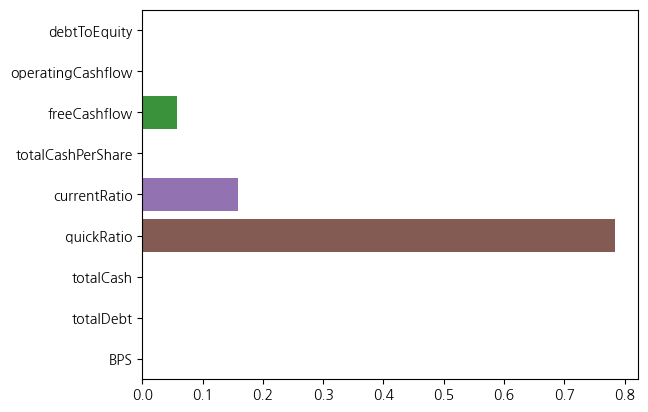

In [ ]:
sns.barplot(x = model.feature_importances_ , y = train_ft.columns)
plt.show()

In [ ]:
params = {
    "decision_tree" : model, # 학습된 모델 객체
    "out_file" : "tree.dot",
    "feature_names" : train_ft.columns,
    "class_names" : ["0","1",'2','3','4',"5","6","7","8"]
}

In [ ]:
export_graphviz(**params)

In [ ]:
import graphviz
with open("tree.dot") as f:
    tree = graphviz.Source(f.read())
tree

# finance 라벨링 기준

In [ ]:
finance_df.cluster.value_counts()

7    90
0    46
8    40
5     9
1     6
4     5
6     2
3     1
2     1
Name: cluster, dtype: int64

In [ ]:
finance_df

,debtToEquity,operatingCashflow,freeCashflow,totalCashPerShare,currentRatio,quickRatio,totalCash,totalDebt,BPS,cluster
0,26.405921,621813.0,5.416000e+03,8322.031655,13.156,9.287,496807.0,936749.0,57822,8
1,85.975876,-5798.0,-7.217500e+04,25376.068376,1.535,0.871,59380.0,177057.0,80052,7
2,64.118628,147805.0,-6.507000e+04,7027.506868,1.669,0.611,49770.0,405810.0,92004,7
3,84.563415,9530.0,-5.331400e+04,12515.806334,1.574,0.763,8908.0,75976.0,126233,7
4,68.917253,61868.0,-3.431000e+03,106137.365867,2.198,1.437,80533.0,401494.0,692323,0
...,...,...,...,...,...,...,...,...,...,...
195,78.042159,-185.0,-5.495110e+10,7200.754417,1.716,0.947,1321.0,4887.0,34132,0
196,117.371847,437.0,1.516298e+11,289.062419,1.878,0.873,139.0,2885.0,5112,7
197,42.032981,-539.0,-9.687191e+10,2367.267073,1.756,1.270,271.0,8233.0,171103,0
198,27.988925,276.0,8.147721e+10,4004.923648,1.976,1.605,898.0,2224.0,31261,8


In [ ]:
import plotly.express as px
fig = px.scatter_3d(finance_df, x='freeCashflow', y='quickRatio', z='currentRatio',
                    color='cluster', symbol='cluster', opacity=0.7, text=df['Name'])

fig.show()

In [ ]:
df[df['Name'] == '한화오션']

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,추정PER,ROE,동종업계ROE,동종업계enterpriseToEbitda,동종업계dividendYield,동종업계trailingEps,동종업계trailingPE,5년평균dividendYield,EBITDAPS,동종업계_대비_PER
34,42660,한화오션,KOSPI,3.6,216856992.0,1137894.0,1449961.0,0.04574,16.6,0.000603,...,-113.6,-117.79,6.82,7.88,2.74,7323.79,9.26,3.726,-13823.0,-9.26


In [ ]:
df[df['Name'] == '삼성생명']

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,추정PER,ROE,동종업계ROE,동종업계enterpriseToEbitda,동종업계dividendYield,동종업계trailingEps,동종업계trailingPE,5년평균dividendYield,EBITDAPS,동종업계_대비_PER
20,32830,삼성생명,KOSPI,3.9,179575008.0,150555.0,193549.0,0.1686,9.42,0.000048,...,6.3,5.27,9.02,NaN,3.71,4283.46,6.38,3.776,121961.0,1.66


In [ ]:
import plotly.express as px
fig = px.scatter_3d(finance_df.drop(index=[34,20]), x='freeCashflow', y='quickRatio', z='currentRatio',
                    color='cluster', symbol='cluster', opacity=0.7, text=df['Name'].drop(index=[34,20]))

fig.show()

In [ ]:
finance_df[finance_df['cluster'] == 4]

,debtToEquity,operatingCashflow,freeCashflow,totalCashPerShare,currentRatio,quickRatio,totalCash,totalDebt,BPS,cluster
23,459.055531,-234775.0,-2.407096e+13,5038.911588,0.610,0.318,32348.0,1928047.0,63158,4
26,699.023683,3990.0,-5.194116e+13,20151.500315,52.660,50.270,8026.0,771827.0,276525,4
62,1080.888734,28785.0,-3.657595e+13,15831.855238,57.866,54.279,9506.0,590349.0,89508,4
98,1135.805215,17390.0,-3.197087e+13,11867.703645,0.553,0.331,9306.0,480014.0,53896,4
120,1911.622916,6369.0,-8.720726e+13,3377.074417,0.605,0.403,25375.0,1532204.0,9020,4


In [ ]:
finance_df.loc[[23,98,120],'cluster'] = 9

In [ ]:
import plotly.express as px
fig = px.scatter_3d(finance_df, x='freeCashflow', y='quickRatio', z='currentRatio',
                    color='cluster', symbol='cluster', opacity=0.7, text=df['Name'])

fig.show()

In [ ]:
finance_df['cluster'].value_counts()

7    90
0    46
8    40
5     9
1     6
9     3
4     2
6     2
3     1
2     1
Name: cluster, dtype: int64

In [ ]:
finance_df['cluster'] = finance_df['cluster'].map({2:"A+",6:"A",1:"B",4:"C",3:"D",5:"E",8:"F",0:"G",7:"H",9:"I"})

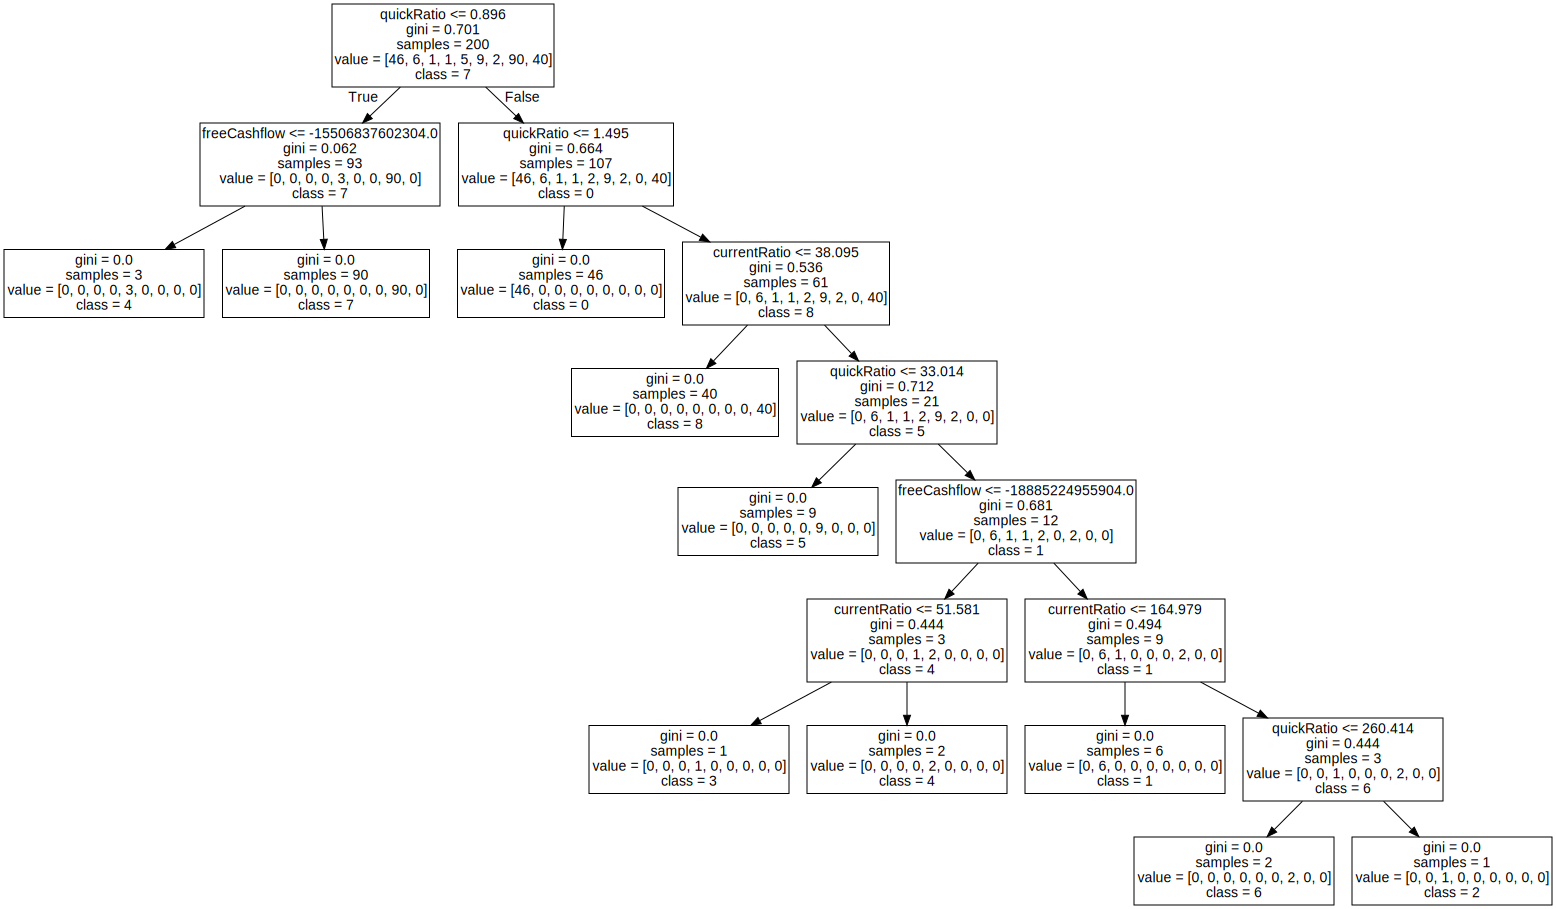

In [ ]:
currentRatio, quickRatio가 finance sector에서 중요하다고 생각 -> 단기적으로 부채를 상환할 수 있는 능력이 되는지를 판단할 수 있기 때문


2 class (한화오션) => currentRatio, quickRatio 모두 상위 99% 이상(압도적), freeCashflow도 낮은 편이 아님 -> 최상위 클래스

6 class => quickRatio 매우 높음(상위 99-%), currentRatio도 상위 99% 이상 freeCashflow도 낮은 편이 아님 -> 차상위 클래스

1 class => currenRatio 상위 89% 이상/quickRatio 상위 93% 이상이고, freeCashflow도 중간 이상인 class 중 currentRatio가 상위 99% 미만인 것들 -> 차차상위 클래스 (currentRatio가 상위 99% 이상이면 6class, 그 와중에 더 높으면 2class로 분류)

4+ class (삼성화재, DB손해보험) => 1class와 마찬가지로 currentRatio 상위 89% 이상/quickRatio 상위 93% 이상인데, freeCashflow가 48%를 못넘는 class -> 중위 클래스
3 class (삼성생명) => 하나만 다른 클래스로 분류되어있는데, Ratio/freeCashflow에서 2class처럼 압도적인 지표가 없음. 위의 4+class와 함께 분류하면 될 듯. # 반대 너무 압도적으로 현금흐름이 가장 적음.

9 class (한국전력, 현대해상, 한화생명) => quickRatio 상위 10% 미만이고, currentRatio 상위 6% 미만, freeCashflow도 상위 3% 이하
Ratio, freeCashflow 를 중점으로 본다면 위의 4class(삼성화재, DB손해보험) 과 묶이는 게 안 맞는다고 생각함. 따라서 이 경우 새로운 클래스로 분류하고, 최하위 클래스로 분류하는 게 좋아보임.

5 > 8 > 0 > 7

5 class -> currentRatio 상위 89% 이상, quickRatio 상위 69-94%
8 class -> currentRatio 상위 89% 이하, quickRatio 상위 69% 이상
0 class -> quickRatio 상위 46-69% (currentRatio 평균도 5 class/8 class 평균보다 낮음)
7 class -> quickRatio 46% 이하이면서 freeCashflow가 4-class(최하위 클래스) 에 속한 것들처럼 아주 낮지 않은(상위 3% 이하가 아닌) class (currentRatio 평균도 5/8/0class 평균보다 낮음)



따라서 위의 기준 (currentRatio, quickRatio, freeCashflow를 중점으로 봤을 때)

2 class => A+ 등급 (A 등급 클래스도 아주 높은 지표이기 때문에 그 중에서도 높은 2 class를 +로 분류)
6 class => A 등급
1 class => B 등급
4 class (삼성화재, DB손해보험)=> C등급
3 class(삼성생명) => D등급
5 class => E 등급
8 class => F 등급
0 class => G 등급
7 class => H 등급
9 class (한국전력, 현대해상, 한화생명) => I 등급

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(finance_df['quickRatio'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: 0.17107999999999998
상위 2%: 0.19366
상위 3%: 0.20773
상위 4%: 0.2484
상위 5%: 0.30925
상위 6%: 0.32928
상위 7%: 0.3496
상위 8%: 0.35559999999999997
상위 9%: 0.38311
상위 10%: 0.39320000000000005
상위 11%: 0.40567000000000003
상위 12%: 0.41552
상위 13%: 0.42896
상위 14%: 0.44532000000000005
상위 15%: 0.4612
상위 16%: 0.48328
상위 17%: 0.4963000000000001
상위 18%: 0.50382
상위 19%: 0.5487800000000002
상위 20%: 0.5624
상위 21%: 0.57016
상위 22%: 0.58346
상위 23%: 0.59
상위 24%: 0.5945199999999999
상위 25%: 0.6005
상위 26%: 0.6049599999999999
상위 27%: 0.61538
상위 28%: 0.62116
상위 29%: 0.63413
상위 30%: 0.6527999999999999
상위 31%: 0.6673800000000001
상위 32%: 0.68108
상위 33%: 0.68735
상위 34%: 0.6995800000000001
상위 35%: 0.7168999999999999
상위 36%: 0.7278399999999999
상위 37%: 0.74278
상위 38%: 0.75962
상위 39%: 0.77032
상위 40%: 0.8122000000000001
상위 41%: 0.833
상위 42%: 0.85974
상위 43%: 0.86713
상위 44%: 0.8758
상위 45%: 0.8811
상위 46%: 0.8876200000000001
상위 47%: 0.90624
상위 48%: 0.91408
상위 49%: 0.9236100000000002
상위 50%: 0.94
상위 51%: 0.9523899999999998
상위 52

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(finance_df['currentRatio'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: 0.44384
상위 2%: 0.5513600000000001
상위 3%: 0.5716399999999999
상위 4%: 0.6098
상위 5%: 0.6512
상위 6%: 0.7235199999999999
상위 7%: 0.74909
상위 8%: 0.75828
상위 9%: 0.80313
상위 10%: 0.8207
상위 11%: 0.87514
상위 12%: 0.88988
상위 13%: 0.9083100000000001
상위 14%: 0.9344800000000001
상위 15%: 0.9445499999999999
상위 16%: 0.95304
상위 17%: 0.96583
상위 18%: 0.97182
상위 19%: 0.9819100000000001
상위 20%: 1.0018
상위 21%: 1.01037
상위 22%: 1.02336
상위 23%: 1.04616
상위 24%: 1.06344
상위 25%: 1.07275
상위 26%: 1.10006
상위 27%: 1.12473
상위 28%: 1.1342
상위 29%: 1.1496499999999998
상위 30%: 1.1835
상위 31%: 1.20028
상위 32%: 1.2219600000000002
상위 33%: 1.25071
상위 34%: 1.2632800000000002
상위 35%: 1.2791
상위 36%: 1.3134
상위 37%: 1.32789
상위 38%: 1.3501
상위 39%: 1.42401
상위 40%: 1.4518
상위 41%: 1.49136
상위 42%: 1.5090599999999998
상위 43%: 1.53671
상위 44%: 1.54112
상위 45%: 1.55955
상위 46%: 1.56978
상위 47%: 1.57353
상위 48%: 1.5901999999999998
상위 49%: 1.60851
상위 50%: 1.6235
상위 51%: 1.63747
상위 52%: 1.65348
상위 53%: 1.65641
상위 54%: 1.66238
상위 55%: 1.669
상위 56%: 1.

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(finance_df['freeCashflow'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -52293822851317.76
상위 2%: -32062976127139.84
상위 3%: -7904714403348.484
상위 4%: -5390276294082.561
상위 5%: -2795805925248.0
상위 6%: -2419575137239.04
상위 7%: -1095852536460.7998
상위 8%: -708081790484.48
상위 9%: -654348910592.0
상위 10%: -608387045785.5999
상위 11%: -537791515525.12
상위 12%: -422097164697.60004
상위 13%: -400859610480.64
상위 14%: -338438659768.32
상위 15%: -320700751872.0
상위 16%: -311865437061.12
상위 17%: -265469809295.35995
상위 18%: -262935140761.6
상위 19%: -249627247902.71997
상위 20%: -225488820633.59998
상위 21%: -204975559966.72
상위 22%: -187803598848.0
상위 23%: -174769971036.16
상위 24%: -167427769630.72003
상위 25%: -155801690112.0
상위 26%: -116245838888.95998
상위 27%: -104375176396.79997
상위 28%: -97292071403.51999
상위 29%: -59024696197.12002
상위 30%: -55195213824.0
상위 31%: -53637534720.00001
상위 32%: -45168128327.68
상위 33%: -41422849925.119995
상위 34%: -34624988528.63995
상위 35%: -29313863680.00001
상위 36%: -28384124600.32
상위 37%: -25134527262.720013
상위 38%: -21809957560.319996
상위 39%: -15442

In [ ]:
df[['Name']+finance].loc[list(finance_df[finance_df.cluster == 2].index)] #currentRatio, quickRatio가 다른 class에 비해 압도적으로 높다.

,Name,debtToEquity,operatingCashflow,freeCashflow,totalCashPerShare,currentRatio,quickRatio,totalCash,totalDebt,BPS
34,한화오션,1542.375839,-10654.0,-6.543489e+11,3042.096978,898.279,345.985,6597.0,114907.0,6945


In [ ]:
df[['Name']+finance].loc[list(finance_df[finance_df.cluster == 6].index)]

,Name,debtToEquity,operatingCashflow,freeCashflow,totalCashPerShare,currentRatio,quickRatio,totalCash,totalDebt,BPS
55,SK스퀘어,29.116948,3424.0,2.085400e+12,7213.435889,188.358,154.924,10016.0,49974.0,118972
82,강원랜드,22.029630,4202.0,9.444000e+11,498.670685,175.425,174.844,1011.0,7524.0,16846


In [ ]:
df[['Name']+finance].loc[list(finance_df[finance_df.cluster == 3].index)] # Ratio와 freeCashflow를 중점으로 본다면 cluster 4와 함께 묶어도 괜찮을 듯.

,Name,debtToEquity,operatingCashflow,freeCashflow,totalCashPerShare,currentRatio,quickRatio,totalCash,totalDebt,BPS
20,삼성생명,1208.173449,-13615.0,-2.012727e+14,37141.582642,50.503,49.071,66697.0,2919974.0,124081


In [ ]:
finance_df0= finance_df[finance_df.cluster==0]
finance_df1= finance_df[finance_df.cluster==1]
finance_df2= finance_df[finance_df.cluster==2]
finance_df3= finance_df[finance_df.cluster==3]
finance_df4= finance_df[finance_df.cluster==4]
finance_df5= finance_df[finance_df.cluster==5]
finance_df6= finance_df[finance_df.cluster==6]
finance_df7= finance_df[finance_df.cluster==7]
finance_df8= finance_df[finance_df.cluster==8]

In [ ]:
df[['Name']+finance].loc[list(finance_df[finance_df.cluster == 4].index)]

,Name,debtToEquity,operatingCashflow,freeCashflow,totalCashPerShare,currentRatio,quickRatio,totalCash,totalDebt,BPS
23,한국전력,459.055531,-234775.0,-2.407096e+13,5038.911588,0.610,0.318,32348.0,1928047.0,63158
26,삼성화재,699.023683,3990.0,-5.194116e+13,20151.500315,52.660,50.270,8026.0,771827.0,276525
62,DB손해보험,1080.888734,28785.0,-3.657595e+13,15831.855238,57.866,54.279,9506.0,590349.0,89508
98,현대해상,1135.805215,17390.0,-3.197087e+13,11867.703645,0.553,0.331,9306.0,480014.0,53896
120,한화생명,1911.622916,6369.0,-8.720726e+13,3377.074417,0.605,0.403,25375.0,1532204.0,9020


In [ ]:
column_name= 'currentRatio'
column_sum = finance_df4[column_name].sum()/len(finance_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

currentRatio 평균: 22.4588


In [ ]:
column_name= 'currentRatio'
column_sum = finance_df0[column_name].sum()/len(finance_df0[column_name])

print(f"{column_name} 평균: {column_sum}")

currentRatio 평균: 1.7600217391304351


In [ ]:
column_name= 'currentRatio'
column_sum = finance_df8[column_name].sum()/len(finance_df8[column_name])

print(f"{column_name} 평균: {column_sum}")

currentRatio 평균: 4.584525


In [ ]:
column_name= 'currentRatio'
column_sum = finance_df5[column_name].sum()/len(finance_df5[column_name])

print(f"{column_name} 평균: {column_sum}")

currentRatio 평균: 114.84944444444444


In [ ]:
column_name= 'currentRatio'
column_sum = finance_df7[column_name].sum()/len(finance_df7[column_name])

print(f"{column_name} 평균: {column_sum}")

currentRatio 평균: 1.1284


# performance

In [ ]:
performance_df = pd.read_csv(f"{DATA_PATH}performance_df.csv")
performance_df

,grossProfits,revenuePerShare,ebitdaMargins,EBITDAPS,cluster
0,433766.0,39878.170,0.19595,12143.0,1
1,12137.0,128204.680,0.11021,13172.0,0
2,68094.0,54607.414,0.38006,28792.0,3
3,9836.0,45224.754,0.42530,18442.0,0
4,48501.0,1091541.100,0.08510,99067.0,4
...,...,...,...,...,...
195,656.0,60615.234,0.08247,5909.0,0
196,500.0,44447.390,0.04759,2093.0,0
197,1106.0,182193.530,0.07402,14666.0,0
198,1199.0,41923.742,0.20700,8956.0,0


In [ ]:
performance_df['cluster'].value_counts()

0    163
4     23
3     12
1      1
2      1
Name: cluster, dtype: int64

In [ ]:
train_ft = performance_df[performance_df.columns[:-1]]
target = performance_df['cluster']

In [ ]:
# 튜닝할 하이퍼파라미터 후보들
max_depth_candidates = [None, 5, 10, 15]
min_samples_split_candidates = [2, 5, 10]
min_samples_leaf_candidates = [1, 2, 4]

# 최적의 하이퍼파라미터와 그에 따른 최고 CV 점수 초기화
best_max_depth = None
best_min_samples_split = None
best_min_samples_leaf = None
best_score = 0

# for 루프를 통한 하이퍼파라미터 튜닝
for max_depth in max_depth_candidates:
    for min_samples_split in min_samples_split_candidates:
        for min_samples_leaf in min_samples_leaf_candidates:
            dt_classifier = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            cv_scores = cross_val_score(dt_classifier, train_ft, target, cv=5, scoring='f1_macro', n_jobs=-1)
            avg_score = np.mean(cv_scores)

            if avg_score > best_score:
                best_score = avg_score
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

            print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}, Avg CV Score: {avg_score}")

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")

Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.7704375201475953
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score: 0.6974690292686565
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 4, Avg CV Score: 0.8207935904675037
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 1, Avg CV Score: 0.7472298698743712
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 2, Avg CV Score: 0.7243769140869891
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 4, Avg CV Score: 0.8207935904675037
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 1, Avg CV Score: 0.7704375201475953
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 2, Avg CV Score: 0.7037708534809285
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 4, Avg CV Score: 0.8207935904675037
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.7704375201475953
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score:

In [ ]:
params = {
    "random_state" :42,
    "criterion" : "gini",
    "min_samples_split" : 2,
    "max_depth" :None,
    "min_samples_leaf" :4
}
model = DecisionTreeClassifier(**params)
model.fit(train_ft,target)
from sklearn.model_selection import KFold, cross_val_score
cv=KFold(n_splits=5,shuffle=True, random_state= SEED)
scores= cross_val_score(model, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
print(f"CLF : {np.mean(scores)}")

CLF : 0.8167323719719801


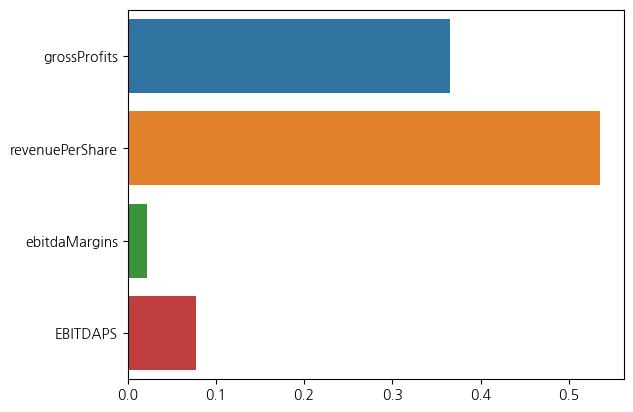

In [ ]:
sns.barplot(x = model.feature_importances_ , y = train_ft.columns)
plt.show()

In [ ]:
params = {
    "decision_tree" : model, # 학습된 모델 객체
    "out_file" : "tree.dot",
    "feature_names" : train_ft.columns,
    "class_names" : ["0","1",'2','3','4']
}

In [ ]:
export_graphviz(**params)

In [ ]:
import graphviz
with open("tree.dot") as f:
    tree = graphviz.Source(f.read())
tree

# performance 라벨링 기준

In [ ]:
fig = px.scatter_3d(performance_df, x='revenuePerShare', y='grossProfits', z='EBITDAPS',
                    color='cluster', symbol='cluster', opacity=0.7, text=df['Name'])

fig.show()

In [ ]:
performance_df[performance_df['cluster'] ==4].index

Int64Index([  4,   5,  17,  26,  29,  56,  58,  66,  69,  96, 108, 109, 111,
            112, 113, 114, 123, 126, 127, 143, 144, 161, 186],
           dtype='int64')

In [ ]:
fig = px.scatter_3d(performance_df.drop(index=performance_df[performance_df['cluster'] ==4].index), x='revenuePerShare', y='grossProfits', z='EBITDAPS',
                    color='cluster', symbol='cluster', opacity=0.7, text=df['Name'].drop(index=performance_df[performance_df['cluster'] ==4].index))

fig.show()

In [ ]:
df[df["Name"] == "태광산업"]

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,추정PER,ROE,동종업계ROE,동종업계enterpriseToEbitda,동종업계dividendYield,동종업계trailingEps,동종업계trailingPE,5년평균dividendYield,EBITDAPS,동종업계_대비_PER
186,3240,태광산업,KOSPI,관련 데이터가 없습니다.,841631.0,708.0,928.0,0.08664,5.62,0.000024,...,관련 데이터가 없습니다.,8.52,8.02,7.44,2.25,9097.35,11.99,0.194,-55625.0,-10.49


In [ ]:
performance_df.loc[186,'cluster'] = 5

In [ ]:
fig = px.scatter_3d(performance_df, x='revenuePerShare', y='grossProfits', z='EBITDAPS',
                    color='cluster', symbol='cluster', opacity=0.7, text=df['Name'])

fig.show()

In [ ]:
performance_df['cluster'].value_counts()

0    163
4     22
3     12
1      1
2      1
5      1
Name: cluster, dtype: int64

In [ ]:
performance_df['cluster'] = performance_df['cluster'].map({1:"A+",3:"A",4:"B",5:"C",0:"D",2:"E"})

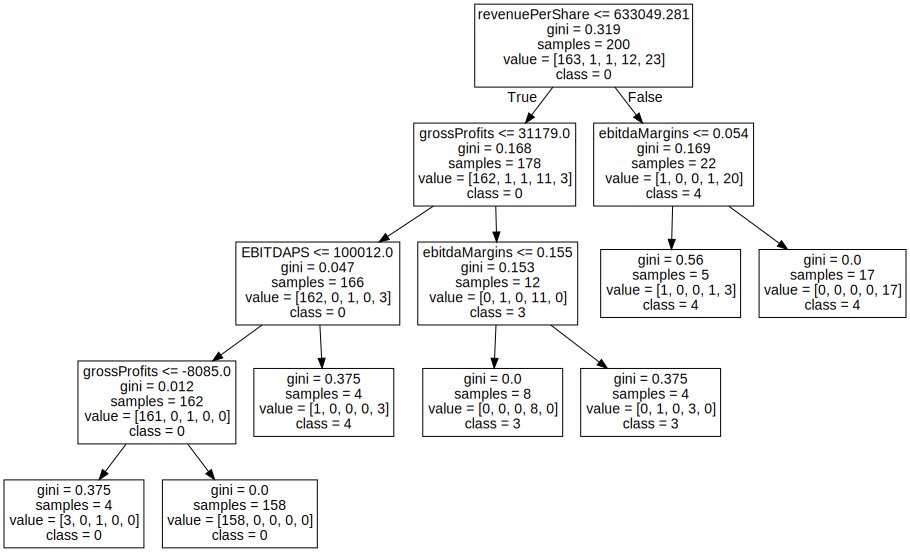

In [ ]:
4 class => revenuePerShare 상위 89% 이상, revenuePerShare 평균값은 상위 97% 이상 (revenuePerShare를 기준으로 봤을 때 최상위 그룹)
3 class => grossProfits 상위 91% 이상, grossProfits 평균값은 상위 96% 이상 (grossProfits를 기준으로 봤을 때 최상위 그룹)
0 class => revenuePerShare도, grossProfits도 다 높지 않은 그룹.

4- class(태광산업) => 4 class 중에 매출은 크지만 수익이 좋지 못한 기업 # 삼성증권 키움증권 등을 따로 묶는 것은 좋아보이지 않음. 분류지점이 애매함.
0 class와 합치기에는 조금 더 높은 등급이라고 생각함. 이들만 따로 묶어서 0 class 위에 올리는 것이 괜찮아보임.

1 class(삼성전자) => grossProfits가 버그 수준 (상위 99% 초과), grossProfits를 중요하게 본다면 압도적인 클래스
2 class(한국전력) => grossProfits가 상위 1% 미만, grossProfits를 중요하게 본다면 최하위 클래스

따라서 grossProfits을 가장 중요하게 생각하여, 이에 따른 기준으로는


1 class => A+ 등급
3 class => A 등급
4 class => B 등급
5 class (태광산업) => C 등급
0 class => D 등급
2 class => E 등급
# 채은님 등급체계 반영

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(performance_df['grossProfits'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -16183.14
상위 2%: -7644.36
상위 3%: -2911.92
상위 4%: -1344.4
상위 5%: -1188.7
상위 6%: -1087.24
상위 7%: -557.2299999999992
상위 8%: -349.2
상위 9%: -146.01999999999998
상위 10%: 8.90000000000013
상위 11%: 67.16000000000003
상위 12%: 138.16
상위 13%: 219.82000000000008
상위 14%: 275.2600000000001
상위 15%: 387.19999999999993
상위 16%: 419.88
상위 17%: 473.1600000000003
상위 18%: 517.22
상위 19%: 559.3500000000001
상위 20%: 654.6
상위 21%: 707.17
상위 22%: 772.0
상위 23%: 812.54
상위 24%: 890.56
상위 25%: 948.0
상위 26%: 1087.3000000000002
상위 27%: 1117.68
상위 28%: 1142.7200000000003
상위 29%: 1160.81
상위 30%: 1177.3
상위 31%: 1224.53
상위 32%: 1294.16
상위 33%: 1385.8100000000002
상위 34%: 1454.9400000000007
상위 35%: 1567.3499999999997
상위 36%: 1647.84
상위 37%: 1751.0399999999995
상위 38%: 1822.6600000000003
상위 39%: 1858.83
상위 40%: 1893.6000000000004
상위 41%: 2015.5799999999992
상위 42%: 2100.84
상위 43%: 2161.3799999999997
상위 44%: 2206.36
상위 45%: 2270.7999999999997
상위 46%: 2344.6200000000003
상위 47%: 2438.78
상위 48%: 2467.08
상위 49%: 2545.42
상위 50%: 

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(performance_df['revenuePerShare'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: 2425.63736
상위 2%: 3285.5427400000003
상위 3%: 3391.51464
상위 4%: 4047.53408
상위 5%: 4140.199
상위 6%: 5232.56862
상위 7%: 6213.514100000001
상위 8%: 7001.4191599999995
상위 9%: 9316.85153
상위 10%: 10559.805400000001
상위 11%: 11169.55119
상위 12%: 11905.89408
상위 13%: 13199.52453
상위 14%: 13687.903199999999
상위 15%: 14897.557349999997
상위 16%: 15856.15988
상위 17%: 16476.99622
상위 18%: 16963.08002
상위 19%: 20302.756360000003
상위 20%: 22489.70040000001
상위 21%: 23887.30381
상위 22%: 25289.84622
상위 23%: 25778.78326
상위 24%: 27555.687479999997
상위 25%: 28476.464
상위 26%: 31071.31996
상위 27%: 32254.947790000002
상위 28%: 32774.3882
상위 29%: 34686.70417999999
상위 30%: 36343.6806
상위 31%: 36505.18049
상위 32%: 39863.31048
상위 33%: 40473.74828
상위 34%: 41863.287280000004
상위 35%: 42245.60739999999
상위 36%: 44252.47456
상위 37%: 44432.78536
상위 38%: 45698.245520000004
상위 39%: 48102.74712
상위 40%: 49018.515
상위 41%: 49148.60991
상위 42%: 50429.87786
상위 43%: 52609.247189999995
상위 44%: 54086.56224
상위 45%: 55388.70735
상위 46%: 56802.86484
상위

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(performance_df['EBITDAPS'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -13999.33
상위 2%: -4703.64
상위 3%: -1218.94
상위 4%: -501.12
상위 5%: -384.45
상위 6%: 78.89999999999993
상위 7%: 238.09000000000003
상위 8%: 319.96
상위 9%: 476.76
상위 10%: 680.2
상위 11%: 964.38
상위 12%: 973.52
상위 13%: 1062.98
상위 14%: 1362.3400000000001
상위 15%: 1430.4499999999998
상위 16%: 1514.32
상위 17%: 1697.41
상위 18%: 1978.64
상위 19%: 2088.44
상위 20%: 2193.6000000000004
상위 21%: 2462.85
상위 22%: 2550.58
상위 23%: 2595.5800000000004
상위 24%: 2707.2
상위 25%: 2898.5
상위 26%: 3012.56
상위 27%: 3284.2100000000005
상위 28%: 3478.480000000001
상위 29%: 3817.8799999999997
상위 30%: 3934.7
상위 31%: 4290.289999999999
상위 32%: 4851.32
상위 33%: 5173.28
상위 34%: 5636.380000000006
상위 35%: 5950.599999999999
상위 36%: 6389.2
상위 37%: 6843.7699999999995
상위 38%: 7236.780000000001
상위 39%: 7829.87
상위 40%: 8349.000000000004
상위 41%: 8759.169999999996
상위 42%: 8972.82
상위 43%: 9001.82
상위 44%: 9295.36
상위 45%: 9768.65
상위 46%: 9956.380000000001
상위 47%: 10572.07
상위 48%: 10724.8
상위 49%: 11128.470000000003
상위 50%: 11439.0
상위 51%: 11561.35999999999

In [ ]:
df[['Name']+performance].loc[list(performance_df[performance_df.cluster == 1].index)]

,Name,totalRevenue,grossProfits,revenuePerShare,ebitdaMargins,EBITDAPS
0,삼성전자,3022314.0,433766.0,39878.17,0.19595,12143.0


In [ ]:
df[['Name']+performance].loc[list(performance_df[performance_df.cluster == 2].index)]

,Name,totalRevenue,grossProfits,revenuePerShare,ebitdaMargins,EBITDAPS
23,한국전력,712579.0,-326552.0,118990.8,-0.24191,-31456.0


In [ ]:
performance_df0= performance_df[performance_df.cluster==0]
performance_df1= performance_df[performance_df.cluster==1]
performance_df2= performance_df[performance_df.cluster==2]
performance_df3= performance_df[performance_df.cluster==3]
performance_df4= performance_df[performance_df.cluster==4]

In [ ]:
column_name= 'revenuePerShare'
performance2= performance_df[performance_df.cluster==4]
performance2= performance2[(performance2[column_name] <= 633049.281)]
performance2 # cluster4는 revenuePerShare가 89% 이상인데, 89%를 넘지 않는 것들, grossProfits도 cluster 4의 평균과 비교했을 때 높지 않은 것을 확인할 수 있음

,grossProfits,revenuePerShare,ebitdaMargins,EBITDAPS,cluster
26,16061.0,536570.75,0.08041,247139.0,4
96,5458.0,417555.70,0.00000,125513.0,4
109,6564.0,285612.28,0.00000,161107.0,4


In [ ]:
df[['Name']+performance].loc[list(performance2.index)] # clster0의 revenuePerShare보다는 꽤 높고 cluster4의 revenuePerShare보다는 꽤 낮다. cluster0이랑 합치기보다 새로운 클래스를 만드는 것이 좋아 보임.

,Name,totalRevenue,grossProfits,revenuePerShare,ebitdaMargins,EBITDAPS
26,삼성화재,206419.0,16061.0,536570.75,0.08041,247139.0
96,한국금융지주,23269.0,5458.0,417555.70,0.00000,125513.0
109,키움증권,12687.0,6564.0,285612.28,0.00000,161107.0


In [ ]:
df[['Name']+performance].loc[list(performance_df[performance_df.cluster == 4].index)]

,Name,totalRevenue,grossProfits,revenuePerShare,ebitdaMargins,EBITDAPS
4,POSCO홀딩스,847502.0,48501.0,1091541.10,0.08510,99067.0
5,LG화학,518649.0,29957.0,701671.75,0.11285,81652.0
17,SK이노베이션,780569.0,39173.0,919732.80,0.05545,60935.0
26,삼성화재,206419.0,16061.0,536570.75,0.08041,247139.0
29,SK,1345516.0,80047.0,2461611.00,0.10897,224697.0
56,현대글로비스,269819.0,17985.0,710970.40,0.08455,60387.0
58,LG이노텍,195894.0,12718.0,845719.56,0.09813,91158.0
66,HD현대,608497.0,33870.0,917340.25,0.07462,62901.0
69,CJ제일제당,300795.0,16647.0,1883521.00,0.09677,187283.0
96,한국금융지주,23269.0,5458.0,417555.70,0.00000,125513.0


In [ ]:
column_name= 'grossProfits'
column_sum = performance_df4[column_name].sum()/len(performance_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

grossProfits 평균: 17729.478260869564


In [ ]:
column_name= 'grossProfits'
column_sum = performance_df0[column_name].sum()/len(performance_df0[column_name])

print(f"{column_name} 평균: {column_sum}")

grossProfits 평균: 4003.7423312883434


In [ ]:
column_name= 'grossProfits'
column_sum = performance_df3[column_name].sum()/len(performance_df3[column_name])

print(f"{column_name} 평균: {column_sum}")

grossProfits 평균: 58498.166666666664


In [ ]:
column_name= 'revenuePerShare'
column_sum = performance_df3[column_name].sum()/len(performance_df3[column_name])

print(f"{column_name} 평균: {column_sum}")

revenuePerShare 평균: 193901.46499999997


In [ ]:
column_name= 'revenuePerShare'
column_sum = performance_df4[column_name].sum()/len(performance_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

revenuePerShare 평균: 1154950.1286956521


In [ ]:
column_name= 'revenuePerShare'
column_sum = performance_df0[column_name].sum()/len(performance_df0[column_name])

print(f"{column_name} 평균: {column_sum}")

revenuePerShare 평균: 113607.45471165645


# price

In [ ]:
price_df = pd.read_csv(f"{DATA_PATH}price_df.csv")
price_df

,52WeekChange,ytdReturn,fiveYearAverageReturn,cluster
0,15.025043,24.59,16.2480,0
1,17.161012,26.98,26.9800,0
2,27.009642,58.00,21.4540,2
3,-11.725664,-2.80,20.2620,0
4,132.295730,115.91,25.9800,2
...,...,...,...,...
195,-39.246863,-24.57,-20.4425,4
196,-43.545455,7.53,-29.3000,0
197,-18.146718,-21.34,-15.1960,4
198,-28.821653,-23.98,-7.3040,4


In [ ]:
price_df['cluster'].value_counts()

0    117
4     54
2     21
3      7
1      1
Name: cluster, dtype: int64

In [ ]:
train_ft = price_df[price_df.columns[:-1]]
target = price_df['cluster']

In [ ]:
# 튜닝할 하이퍼파라미터 후보들
max_depth_candidates = [None, 5, 10, 15]
min_samples_split_candidates = [2, 5, 10]
min_samples_leaf_candidates = [1, 2, 4]

# 최적의 하이퍼파라미터와 그에 따른 최고 CV 점수 초기화
best_max_depth = None
best_min_samples_split = None
best_min_samples_leaf = None
best_score = 0

# for 루프를 통한 하이퍼파라미터 튜닝
for max_depth in max_depth_candidates:
    for min_samples_split in min_samples_split_candidates:
        for min_samples_leaf in min_samples_leaf_candidates:
            dt_classifier = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            cv_scores = cross_val_score(dt_classifier, train_ft, target, cv=5, scoring='f1_macro', n_jobs=-1)
            avg_score = np.mean(cv_scores)

            if avg_score > best_score:
                best_score = avg_score
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
                best_min_samples_leaf = min_samples_leaf

            print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}, Avg CV Score: {avg_score}")

print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_samples_split}")
print(f"Best Min Samples Leaf: {best_min_samples_leaf}")

Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.9037125514714057
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score: 0.7366802385462357
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 4, Avg CV Score: 0.7264729671819329
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 1, Avg CV Score: 0.8944308054396597
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 2, Avg CV Score: 0.7474112218486475
Max Depth: None, Min Samples Split: 5, Min Samples Leaf: 4, Avg CV Score: 0.7264729671819329
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 1, Avg CV Score: 0.860125249884104
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 2, Avg CV Score: 0.7877381859676283
Max Depth: None, Min Samples Split: 10, Min Samples Leaf: 4, Avg CV Score: 0.7299969921765462
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 1, Avg CV Score: 0.8745756097381907
Max Depth: 5, Min Samples Split: 2, Min Samples Leaf: 2, Avg CV Score: 

In [ ]:
params = {
    "random_state" :42,
    "criterion" : "gini",
    "min_samples_split" : 2,
    "max_depth" :None,
    "min_samples_leaf" :1
}
model = DecisionTreeClassifier(**params)
model.fit(train_ft,target)
from sklearn.model_selection import KFold, cross_val_score
cv=KFold(n_splits=5,shuffle=True, random_state= SEED)
scores= cross_val_score(model, train_ft, target, cv=cv, scoring='f1_macro', n_jobs=-1)
print(f"CLF : {np.mean(scores)}")

CLF : 0.8190306143335093


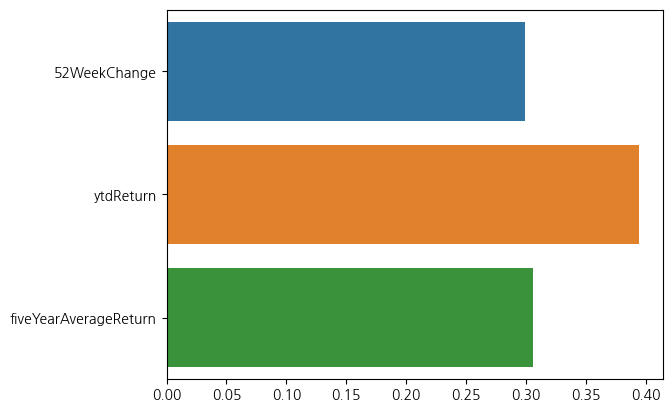

In [ ]:
sns.barplot(x = model.feature_importances_ , y = train_ft.columns)
plt.show()

In [ ]:
params = {
    "decision_tree" : model, # 학습된 모델 객체
    "out_file" : "tree.dot",
    "feature_names" : train_ft.columns,
    "class_names" : ["0","1",'2','3','4']
}

In [ ]:
export_graphviz(**params)

In [ ]:
import graphviz
with open("tree.dot") as f:
    tree = graphviz.Source(f.read())
tree

In [ ]:
get_3d_tsne(price_df.drop(columns = ['cluster']),price_df.cluster,df["Name"])

In [ ]:
price_df

,52WeekChange,ytdReturn,fiveYearAverageReturn,cluster
0,15.025043,24.59,16.2480,0
1,17.161012,26.98,26.9800,0
2,27.009642,58.00,21.4540,2
3,-11.725664,-2.80,20.2620,0
4,132.295730,115.91,25.9800,2
...,...,...,...,...
195,-39.246863,-24.57,-20.4425,4
196,-43.545455,7.53,-29.3000,0
197,-18.146718,-21.34,-15.1960,4
198,-28.821653,-23.98,-7.3040,4


In [ ]:
import plotly.express as px
fig = px.scatter_3d(price_df.drop(index=[44]), x='52WeekChange', y='ytdReturn', z='fiveYearAverageReturn',
                    color='cluster', symbol='cluster', opacity=0.7, text=df.drop(index=[44])['Name'])
fig.update_layout(legend_xanchor="left", legend_yanchor="bottom")
fig.show()

In [ ]:
df[df["Name"] == "신풍제약"][price]

,marketCap,currentPrice,fiftyDayAverage,twoHundredDayAverage,52WeekChange,ytdReturn,fiveYearAverageReturn,beta
164,1.010478e+12,19400.0,16734.0,19493.45,-33.076924,-9.5,301.626,1.49


In [ ]:
df[df["Name"] == "금양"][price]

,marketCap,currentPrice,fiftyDayAverage,twoHundredDayAverage,52WeekChange,ytdReturn,fiveYearAverageReturn,beta
44,8.145767e+12,143600.0,89731.0,54177.5,1200.9091,498.74,207.74,0.99


In [ ]:
price_df['cluster'].value_counts()

0    117
4     54
2     21
3      7
1      1
Name: cluster, dtype: int64

In [ ]:
mask = price_df[price_df['cluster'] == 0]['fiveYearAverageReturn'] > price_df[price_df['cluster'] == 0]['fiveYearAverageReturn'].describe()['mean']

In [ ]:
price_df.loc[list(price_df[price_df['cluster'] == 0][mask].index),'cluster'] = 5

In [ ]:
import plotly.express as px
fig = px.scatter_3d(price_df.drop(index=[44]), x='52WeekChange', y='ytdReturn', z='fiveYearAverageReturn',
                    color='cluster', symbol='cluster', opacity=0.7, text=df.drop(index=[44])['Name'])
fig.update_layout(legend_xanchor="left", legend_yanchor="bottom")
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(price_df[(price_df['cluster']!=3)&(price_df['cluster']!=2)&(price_df['cluster']!=1)], x='52WeekChange', y='ytdReturn', z='fiveYearAverageReturn',
                    color='cluster', symbol='cluster', opacity=0.7, text=df[(price_df['cluster']!=3)&(price_df['cluster']!=2)&(price_df['cluster']!=1)]['Name'])
fig.update_layout(legend_xanchor="left", legend_yanchor="bottom")
fig.show()

In [ ]:
price_df['cluster'].value_counts()

0    67
4    54
5    50
2    21
3     7
1     1
Name: cluster, dtype: int64

In [ ]:
price_df['cluster'] = price_df['cluster'].map({1:"A+",3:"A",2:"B",5:"C",0:"D",4 : "E"})

# price 라벨링 기준

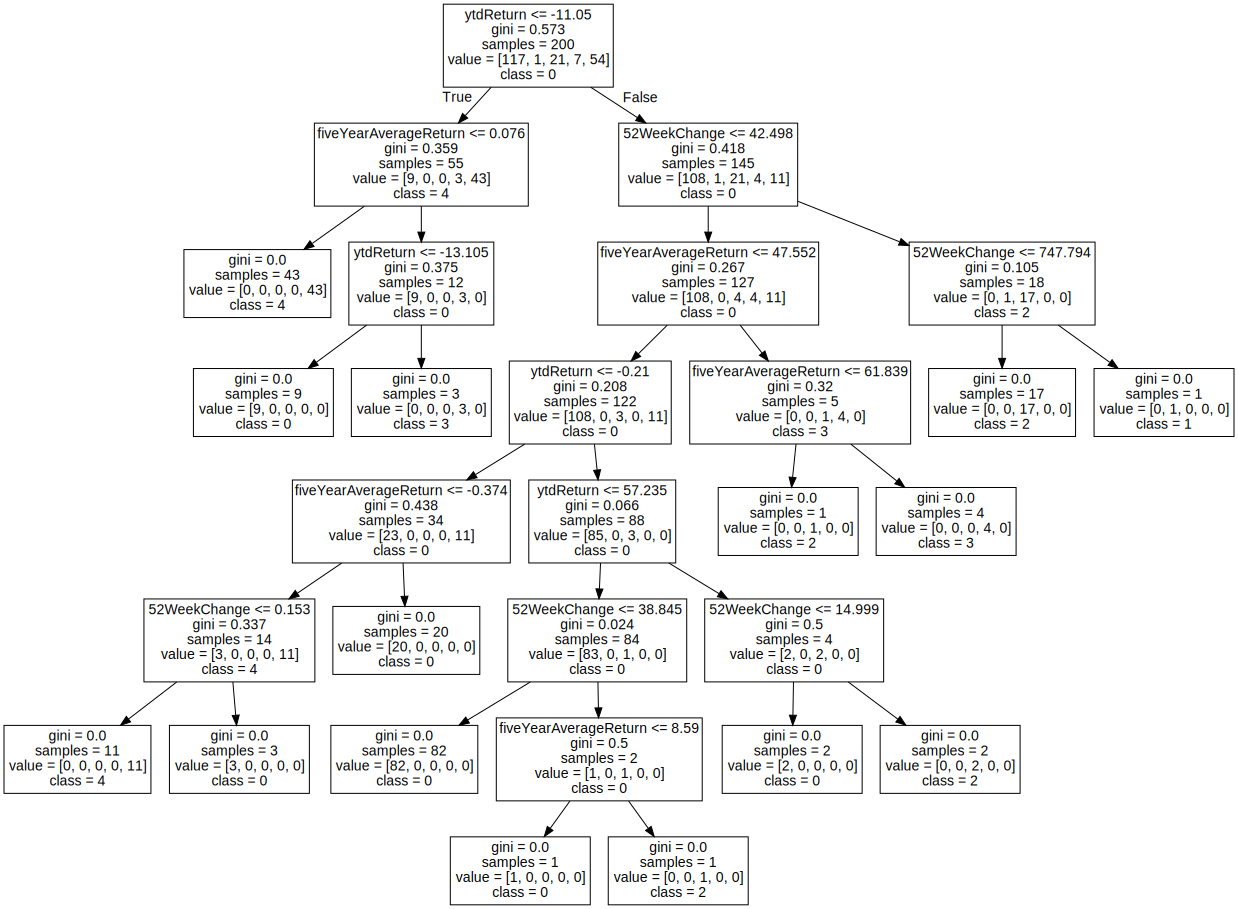

In [ ]:
1 class (금양) => ytdReturn/fiveYearAverageReturn/52WeekChange 모두 상위 99% 이상 => 압도적 최상위 클래스

4 class => ytdReturn 상위 27% 미만이면서 fiveYearAverageReturn 상위 44% 미만 => 최하위 클래스
또는 ytdReturn이 27%-46%이고, fiveYearAverageReturn이 상위 42% 미만인 것들 => 최하위 클래스

3 class => ytdReturn이 상위 22% 이상이면서, fiveYearAverageReturn이 상위 94% 이상 => 상위 클래스
3 class 중 (신풍제약) => fiveYearAverageReturn 값이 1 class 금양보다도 더 높다. 다만 금양은 다른 지표도 압도적이기 때문에 만약 fiveYearAverageReturn 값만을 price에서 중요한 지표로
본다면 신풍제약도 1 class 로 묶어도 될 듯. # 반대

2 > 0 > 4

2 class 상위그룹 (52Weekchange 기준) => ytdReturn이 상위 27% 이상이면서, 52weekChange가 상위 91%-99% 사이 (52weekChange가 이보다 더 높은건 1 class밖에 없다.)
52weekChange보다 fiveYearAverageReturn이 더 중요한 지표라고 생각하기 때문에 3 class보다 하위 클래스로 분류. (2 class의 fiveYearAverageReturn의 평균이 3 class보다 낮음.)

2 class 하위그룹 (52Weekchange 기준) =>
(52weekChange가 상위 91%를 넘지는 못하지만, fiveYearAverageReturn이 상위 93-95%인 그룹이거나
fiveYearAverageReturn이 93%를 못 넘는다면 ytdReturn이 91%를 넘고 52weekchange가 81%를 넘음
또는 ytdReturn이 86%를 넘고 fiveYearAverageReturn이 63%를 넘고 52weekchange가 90%를 넘음.)

2 class 상위그룹이나 하위그룹이나 분류된 것들을 봤을 때 딱히 따로 분류하지 않아도 될 것 같음.

0 class => 위에서 분류되지 않은 남은 모든 분류

따라서


1 class 금양 => A+ 등급 (fiveYearAverageReturn값만을 중요한 지표로 본다면 신풍제약도 A 등급)
3 class => A 등급
2 class => B 등급
5 class => C 등급 0클래스 중 fiveYearAverageReturn이 평균이상인 그룹
0 class => D 등급
4 class => E 등급

(실제로 class 별 fiveYearAverageReturn 값의 평균치를 봤을 때 위에서 나눈 것처럼 1>3>2>0>4 class 순으로 높은 것을 볼 수 있음.)

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(price_df['ytdReturn'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -39.1528
상위 2%: -32.828
상위 3%: -30.8855
상위 4%: -30.6628
상위 5%: -30.103
상위 6%: -28.742
상위 7%: -27.225899999999996
상위 8%: -25.1536
상위 9%: -24.0331
상위 10%: -22.558999999999997
상위 11%: -21.3543
상위 12%: -20.563200000000002
상위 13%: -20.2382
상위 14%: -19.7454
상위 15%: -19.592
상위 16%: -19.0016
상위 17%: -17.570399999999992
상위 18%: -16.997400000000003
상위 19%: -16.8857
상위 20%: -16.69
상위 21%: -16.3057
상위 22%: -15.065199999999999
상위 23%: -12.886299999999997
상위 24%: -12.3468
상위 25%: -11.6675
상위 26%: -11.4582
상위 27%: -11.2229
상위 28%: -10.726799999999999
상위 29%: -9.991800000000001
상위 30%: -9.590000000000002
상위 31%: -9.258600000000001
상위 32%: -8.8552
상위 33%: -8.3865
상위 34%: -7.484199999999988
상위 35%: -7.005000000000001
상위 36%: -6.3751999999999995
상위 37%: -5.790200000000002
상위 38%: -5.421599999999999
상위 39%: -4.1546
상위 40%: -3.1959999999999957
상위 41%: -2.741000000000001
상위 42%: -2.1268000000000007
상위 43%: -1.1515000000000002
상위 44%: -0.6875999999999993
상위 45%: -0.2030000000000004
상위 46%: 1.171000000

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(price_df['fiveYearAverageReturn'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -30.502850000000002
상위 2%: -29.3107
상위 3%: -26.053900000000002
상위 4%: -21.927
상위 5%: -20.8312
상위 6%: -18.359616666666668
상위 7%: -16.67926
상위 8%: -15.21296
상위 9%: -14.26924
상위 10%: -12.960599999999998
상위 11%: -12.55122
상위 12%: -12.02688
상위 13%: -11.16644
상위 14%: -10.220026666666667
상위 15%: -10.1081
상위 16%: -9.90752
상위 17%: -9.8634
상위 18%: -9.52256
상위 19%: -9.18428
상위 20%: -8.6208
상위 21%: -8.53662
상위 22%: -7.557
상위 23%: -7.097839999999999
상위 24%: -6.91032
상위 25%: -6.331
상위 26%: -5.792179999999999
상위 27%: -4.9082399999999975
상위 28%: -4.623279999999999
상위 29%: -4.365800000000001
상위 30%: -4.0552
상위 31%: -3.7629800000000007
상위 32%: -3.3354399999999997
상위 33%: -3.0836599999999996
상위 34%: -2.867879999999998
상위 35%: -2.624825
상위 36%: -2.46736
상위 37%: -2.030360000000001
상위 38%: -1.8015999999999996
상위 39%: -1.40056
상위 40%: -0.9239999999999953
상위 41%: -0.5312200000000005
상위 42%: -0.2479999999999997
상위 43%: -0.05771999999999949
상위 44%: 0.15495999999999982
상위 45%: 0.46499999999999897
상위 46%: 

In [ ]:
percentiles= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]
percentile_values= np.percentile(price_df['52WeekChange'],percentiles)
for p, value in zip(percentiles, percentile_values):
    print(f"상위 {p}%: {value}")

상위 1%: -47.9194682
상위 2%: -43.57685616
상위 3%: -41.1025865
상위 4%: -40.001635199999996
상위 5%: -39.273490499999994
상위 6%: -37.6302066
상위 7%: -36.92052205
상위 8%: -36.0630852
상위 9%: -35.712430260000005
상위 10%: -35.2352964
상위 11%: -34.360294110000005
상위 12%: -33.54222068
상위 13%: -33.23767242
상위 14%: -33.08806408
상위 15%: -31.6413163
상위 16%: -31.22987172
상위 17%: -30.251367379999994
상위 18%: -29.57570234
상위 19%: -28.86166833
상위 20%: -28.140795999999998
상위 21%: -27.70728251
상위 22%: -26.757891800000003
상위 23%: -25.850009919999998
상위 24%: -24.35088876
상위 25%: -23.558541
상위 26%: -23.12504736
상위 27%: -22.5885112
상위 28%: -22.21654992
상위 29%: -21.38798888
상위 30%: -20.874097700000004
상위 31%: -20.38055474
상위 32%: -19.46999656
상위 33%: -18.89600674
상위 34%: -18.321475959999994
상위 35%: -17.375039100000002
상위 36%: -17.041394359999998
상위 37%: -16.302979800000003
상위 38%: -16.07851368
상위 39%: -15.56889992
상위 40%: -15.1246406
상위 41%: -14.791393930000003
상위 42%: -14.65460408
상위 43%: -14.358269560000002
상위 44%: -14

In [ ]:
df[['Name']+price].loc[list(price_df[price_df.cluster == 0].index)]

,Name,marketCap,currentPrice,fiftyDayAverage,twoHundredDayAverage,52WeekChange,ytdReturn,fiveYearAverageReturn,beta
0,삼성전자,4.525489e+14,68000.0,71160.0,64285.00,15.025043,24.59,16.2480,0.95
1,LG에너지솔루션,1.332443e+14,556000.0,565040.0,547310.00,17.161012,26.98,26.9800,0.99
3,삼성바이오로직스,5.708155e+13,802000.0,763120.0,803030.00,-11.725664,-2.80,20.2620,0.67
5,LG화학,4.771839e+13,634000.0,688300.0,687460.00,-4.255319,5.00,25.6460,1.61
6,삼성SDI,4.112129e+13,622000.0,692580.0,696510.00,2.423263,7.28,35.1340,1.30
...,...,...,...,...,...,...,...,...,...
189,HDC현대산업개발,6.571909e+11,10240.0,11247.4,11143.50,-22.366410,1.70,-20.7860,1.18
190,한세실업,7.896251e+11,20050.0,18373.0,16792.40,11.953354,24.68,1.7160,1.22
191,더블유게임즈,7.081262e+11,42850.0,42195.0,45704.25,6.180465,-9.10,-2.6375,1.05
194,보령,6.053058e+11,9190.0,8354.6,9217.70,-18.660712,0.55,9.5220,0.93


In [ ]:
column_name = '52WeekChange'

selected_rows = price_df2[(price_df2[column_name] > 42.498) & (price_df2[column_name]<747.794)]
selected_rows
selected_rows2= selected_rows[(selected_rows['ytdReturn']>11.05)]
selected_rows2 #상위 cluster2 그룹 (52weekChange 기준)

,52WeekChange,ytdReturn,fiveYearAverageReturn,cluster
4,132.295730,115.91,25.9800,2
9,184.112140,153.33,85.4425,2
19,294.678500,293.81,65.8540,2
32,43.767310,49.57,39.8700,2
33,69.520545,15.93,69.3600,2
34,111.832950,140.90,17.4320,2
45,52.420700,78.67,9.8140,2
50,67.757010,61.35,21.8880,2
61,66.902400,60.33,34.2480,2
63,72.519090,63.29,16.2020,2


In [ ]:
column_name = '52WeekChange'

selected_rows3 = price_df2[(price_df2[column_name] <= 42.498)]
selected_rows3
selected_rows3  #하위 cluster2 그룹 (52weekChange 기준) #전체적인 수치가 많이 떨어지는 것이 없어서 상위 cluster2 그룹과 합쳐도 될듯

,52WeekChange,ytdReturn,fiveYearAverageReturn,cluster
2,27.009642,58.00,21.454,2
40,30.106378,72.98,3.824,2
59,38.991523,36.54,21.190,2
103,29.976583,49.39,56.440,2


In [ ]:
df[['Name']+price].loc[list(price_df[price_df.cluster == 1].index)]

,Name,marketCap,currentPrice,fiftyDayAverage,twoHundredDayAverage,52WeekChange,ytdReturn,fiveYearAverageReturn,beta
44,금양,8.145767e+12,143600.0,89731.0,54177.5,1200.9091,498.74,207.74,0.99


In [ ]:
df[['Name']+price].loc[list(price_df[price_df.cluster == 3].index)] # 신풍제약은 금양보다도 fiveYearAverageReturn값이 높다.

,Name,marketCap,currentPrice,fiftyDayAverage,twoHundredDayAverage,52WeekChange,ytdReturn,fiveYearAverageReturn,beta
39,HMM,8.646210e+12,17680.0,18506.4,20162.25,-31.620556,-11.51,68.608,1.21
91,씨에스윈드,2.842064e+12,68600.0,81244.0,73774.00,8.761334,4.65,82.472,1.32
101,한전기술,2.663045e+12,70000.0,71894.0,66538.25,-0.966853,31.32,71.342,1.39
123,효성첨단소재,2.021779e+12,452500.0,462720.0,410615.00,8.854783,38.23,67.238,1.59
128,두산퓨얼셀,1.732017e+12,26450.0,28363.0,31605.75,-35.687733,-11.58,115.435,1.63
163,SK케미칼,1.134989e+12,65900.0,68638.0,77889.50,-39.999998,-12.70,79.608,1.41
164,신풍제약,1.010478e+12,19400.0,16734.0,19493.45,-33.076924,-9.50,301.626,1.49


In [ ]:
df[['Name']+price].loc[list(price_df[price_df.cluster == 2].index)]

,Name,marketCap,currentPrice,fiftyDayAverage,twoHundredDayAverage,52WeekChange,ytdReturn,fiveYearAverageReturn,beta
2,SK하이닉스,8.422079e+13,118500.0,116016.0,94370.500,27.009642,58.00,21.4540,1.17
4,POSCO홀딩스,4.537397e+13,598000.0,461190.0,355920.000,132.295730,115.91,25.9800,1.01
9,포스코퓨처엠,3.499362e+13,452000.0,418220.0,288523.000,184.112140,153.33,85.4425,1.34
19,포스코인터내셔널,1.548401e+13,91000.0,50869.0,30502.000,294.678500,293.81,65.8540,1.03
32,하이브,1.068299e+13,256500.0,275460.0,211947.500,43.767310,49.57,39.8700,1.71
33,메리츠금융지주,9.587125e+12,48200.0,45212.0,41211.750,69.520545,15.93,69.3600,1.16
34,한화오션,1.054991e+13,46450.0,39390.0,26765.250,111.832950,140.90,17.4320,0.90
40,HD한국조선해양,8.443323e+12,119400.0,117516.0,88612.000,30.106378,72.98,3.8240,1.01
45,삼성중공업,7.831510e+12,9170.0,7519.0,5893.850,52.420700,78.67,9.8140,0.90
50,삼성엔지니어링,7.291200e+12,37200.0,30932.0,27727.000,67.757010,61.35,21.8880,0.94


In [ ]:
price_df0= price_df[price_df.cluster==0]
price_df1= price_df[price_df.cluster==1]
price_df2= price_df[price_df.cluster==2]
price_df3= price_df[price_df.cluster==3]
price_df4= price_df[price_df.cluster==4]

In [ ]:
column_name= 'fiveYearAverageReturn'
column_sum = price_df3[column_name].sum()/len(price_df3[column_name])

print(f"{column_name} 평균: {column_sum}")

fiveYearAverageReturn 평균: 112.33271428571427


In [ ]:
column_name= 'fiveYearAverageReturn'
column_sum = price_df1[column_name].sum()/len(price_df1[column_name])

print(f"{column_name} 평균: {column_sum}")

fiveYearAverageReturn 평균: 207.74


In [ ]:
column_name= 'fiveYearAverageReturn'
column_sum = price_df0[column_name].sum()/len(price_df0[column_name])

print(f"{column_name} 평균: {column_sum}")

fiveYearAverageReturn 평균: 6.866623931623933


In [ ]:
column_name= 'fiveYearAverageReturn'
column_sum = selected_rows2[column_name].sum()/len(selected_rows2[column_name])

print(f"{column_name} 평균: {column_sum}")

fiveYearAverageReturn 평균: 29.56014705882353


In [ ]:
column_name= 'fiveYearAverageReturn'
column_sum = price_df4[column_name].sum()/len(price_df4[column_name])

print(f"{column_name} 평균: {column_sum}")

fiveYearAverageReturn 평균: -11.15063888888889


In [ ]:
column_name= 'fiveYearAverageReturn'
column_sum = price_df2[column_name].sum()/len(price_df2[column_name])

print(f"{column_name} 평균: {column_sum}")

fiveYearAverageReturn 평균: 28.830023809523805


# 파일 저장하기

In [ ]:
dividend_df.to_csv(f"{DATA_PATH}dividend_df2.csv",index=False)

In [ ]:
growth_df.to_csv(f"{DATA_PATH}growth_df2.csv",index=False)

In [ ]:
value_df.to_csv(f"{DATA_PATH}value_df2.csv",index=False)

In [ ]:
business_df.to_csv(f"{DATA_PATH}business_df2.csv",index=False)

In [ ]:
finance_df.to_csv(f"{DATA_PATH}finance_df2.csv",index=False)

In [ ]:
performance_df.to_csv(f"{DATA_PATH}performance_df2.csv",index=False)

In [ ]:
price_df.to_csv(f"{DATA_PATH}volitality_df2.csv",index=False)

In [ ]:
df['dividend'] = dividend_df['cluster']

In [ ]:
df['growth'] = growth_df['cluster']

In [ ]:
df['value'] = value_df['cluster']

In [ ]:
df['business'] = business_df['cluster']

In [ ]:
df['finance'] = finance_df['cluster']

In [ ]:
df['performance'] = performance_df['cluster']

In [ ]:
df['volitality'] = price_df['cluster']

In [ ]:
df[['Name','dividend','growth','value','business','finance','performance','volitality']]

,Name,dividend,growth,value,business,finance,performance,volitality
0,삼성전자,C,C,D,B,F,A+,C
1,LG에너지솔루션,E,B,B,B,H,D,C
2,SK하이닉스,D,C,C,C,H,A,B
3,삼성바이오로직스,E,A,C,A,H,D,C
4,POSCO홀딩스,B,C,D,B,G,B,B
...,...,...,...,...,...,...,...,...
195,지누스,D,C,D,C,G,D,E
196,케이카,B,C,D,C,H,D,D
197,현대홈쇼핑,C,C,E,B,G,D,E
198,쿠쿠홈시스,D,C,F,A,F,D,E


In [ ]:
tmp = df[["Name"]+finance]

In [ ]:
df[(df['finance'] == "A")|(df['finance'] == "B")|(df['finance'] == "C")]

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
7,5380,현대차,KOSPI,4.0,202876000.0,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058000,53685.0,-2.62,C,B,E,C,B,A,C
26,810,삼성화재,KOSPI,4.0,39828300.0,72446.0,80608.0,0.50955,11.37,0.000286,...,5.060000,247139.0,1.89,B,C,D,B,C,B,D
38,10950,S-Oil,KOSPI,3.9,112583000.0,445685.0,377401.0,0.16785,4.21,0.000120,...,3.000000,34776.0,-7.70,C,C,E,C,B,A,E
43,24110,기업은행,KOSPI,3.8,797425984.0,962530.0,739210.0,0.13406,9.94,0.000066,...,5.086000,36302.0,-10.47,B,B,E,A,B,A,D
55,402340,SK스퀘어,KOSPI,4.0,138852000.0,325515.0,360365.0,0.34427,20.53,0.000505,...,2.532000,3798.0,19.21,C,D,D,C,A,D,D
62,5830,DB손해보험,KOSPI,4.0,60043500.0,195987.0,191584.0,0.39709,14.40,0.000416,...,4.852000,78063.0,-1.53,B,C,E,B,C,D,D
82,35250,강원랜드,KOSPI,4.0,202739008.0,741364.0,653418.0,0.16694,1.52,0.000031,...,2.453333,1382.0,1.46,C,D,D,C,A,D,E
84,5940,NH투자증권,KOSPI,3.9,330982016.0,654790.0,478797.0,0.13677,9.62,0.000109,...,6.016000,20648.0,5.55,A,C,D,A,B,D,D
94,8930,한미사이언스,KOSPI,관련 데이터가 없습니다.,67996096.0,451396.0,186195.0,0.09883,4.85,0.002005,...,4.556000,480.0,35.21,B,C,C,B,B,D,D
99,111770,영원무역,KOSPI,4.0,43866100.0,98876.0,108274.0,0.33119,2.30,0.000047,...,4.708000,20674.0,-6.32,B,A,E,A,B,D,C


In [ ]:
df.to_csv(f"{DATA_PATH}labeled_data_final.csv",index=False)

In [ ]:
df[info]

,목표주가,recommendationKey,추정EPS,추정PER,동종업계ROE,동종업계enterpriseToEbitda,동종업계dividendYield,동종업계trailingEps,동종업계trailingPE
0,91364.0,4.0,1504.0,45.2,12.95,5.49,1.74,27936.99,9.59
1,755957.0,4.0,8013.0,69.4,12.95,5.49,1.74,27936.99,9.59
2,142952.0,4.0,-10753.0,-11.0,12.95,5.49,1.74,27936.99,9.59
3,1071000.0,4.0,11163.0,71.8,8.16,28.47,0.26,6242.01,48.89
4,707667.0,3.9,37348.0,16.0,7.69,4.67,3.45,11392.07,6.29
...,...,...,...,...,...,...,...,...,...
195,51000,4.0,1180,24.7,9.89,6.68,1.88,12256.92,10.91
196,18200,4.0,881,14.1,6.36,7.09,2.41,6625.56,10.13
197,59500,4.0,11875,3.6,6.36,7.09,2.41,6625.56,10.13
198,관련 데이터가 없습니다.,관련 데이터가 없습니다.,관련 데이터가 없습니다.,관련 데이터가 없습니다.,5.75,10.61,0.93,7358.71,26.73
